<a href="https://colab.research.google.com/github/thetorangi/data-mining/blob/main/leetcode_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****CodeVueSutra****


*“Sankalp to Siddhi: Your Journey to Interview Nirvana.” - the CodeVueSutra way*

# **1. Project Initialization & Setup**

Description: Importing essential Python libraries and frameworks required for data processing, modeling, and visualization.

In [ ]:
import heapq
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler , LabelEncoder, StandardScaler
from lightgbm import LGBMClassifier
from hdbscan import HDBSCAN
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, classification_report, confusion_matrix,
                            roc_auc_score, precision_recall_curve, auc ,silhouette_score, davies_bouldin_score, calinski_harabasz_score)
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **2. Data Acquisition & Preprocessing**

Description:
Loading the LeetCode dataset, handling missing values, and performing feature engineering — including engagement ratios, topic extraction, and company-specific indicators to enrich the dataset.

In [ ]:
# ========================
# 1. DATA LOADING & CLEANING
# ========================
df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset1.csv')

# Clean list-type columns
def clean_list(text):
    return [] if pd.isna(text) else [x.strip() for x in str(text).split(',')]

df['companies'] = df['companies'].apply(clean_list)
df['related_topics'] = df['related_topics'].apply(clean_list)

# Convert numeric fields
df['acceptance_rate'] = df['acceptance_rate'].replace('%', '', regex=True).astype(float)
df['frequency'] = df['frequency'].astype(float)

# Handle missing values
print("Initial missing values:\n", df.isna().sum())
df['acceptance_rate'] = df['acceptance_rate'].fillna(df['acceptance_rate'].median())
df['frequency'] = df['frequency'].fillna(df['frequency'].median())

# Normalization
scaler = MinMaxScaler()
df[['normalized_freq']] = scaler.fit_transform(df[['frequency']])

Initial missing values:
 id                      0
title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies               0
related_topics          0
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64


# **3. Exploratory Data Analysis (EDA)**

Description: Statistical summaries and descriptive analysis of key features (e.g., problem difficulty distribution, acceptance rates, and topic frequencies).

In [ ]:
# ========================
# 2. DESCRIPTIVE STATISTICS
# ========================
print("\n=== BASIC STATISTICS ===")
print("Numerical summary:\n", df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].describe())

print("\n=== CATEGORICAL DISTRIBUTIONS ===")
print("Difficulty levels:\n", df['difficulty'].value_counts())
print("\nPremium status:\n", df['is_premium'].value_counts())

print("\n=== TOP COMPANIES & TOPICS ===")
top_companies = pd.Series([c for sub in df['companies'] for c in sub]).value_counts().head(10)
print("Top companies:\n", top_companies)

top_topics = pd.Series([t for sub in df['related_topics'] for t in sub]).value_counts().head(10)
print("\nTop topics:\n", top_topics)

print("\n=== CORRELATIONS ===")
print(df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].corr())


=== BASIC STATISTICS ===
Numerical summary:
        acceptance_rate    frequency         likes     dislikes
count      1825.000000  1825.000000   1825.000000  1825.000000
mean         53.139616    21.113041   1050.534795   279.010959
std          14.778411    22.364741   1512.674013   608.489206
min          13.900000     0.000000      2.000000     0.000000
25%          42.400000     3.100000    217.000000    32.000000
50%          51.600000    13.500000    516.000000    92.000000
75%          62.800000    31.800000   1200.000000   239.000000
max          95.600000   100.000000  20217.000000  8900.000000

=== CATEGORICAL DISTRIBUTIONS ===
Difficulty levels:
 difficulty
Medium    963
Easy      477
Hard      385
Name: count, dtype: int64

Premium status:
 is_premium
0    1427
1     398
Name: count, dtype: int64

=== TOP COMPANIES & TOPICS ===
Top companies:
 Amazon       690
Google       553
Facebook     411
Microsoft    355
Bloomberg    220
Apple        211
Adobe        119
Oracle     

# **4. Data Visualization Suite**

Description:
Professional plots to support analytical insights. The following visualizations were created:

    Problem Difficulty Analysis (Countplot)

    Premium vs Free Problems Distribution (Countplot)

    Top Companies and Top Topics (Barplot)

    FAANG vs Non-FAANG: Acceptance Rate Comparison (Boxplot)

    Acceptance Rate vs Problem Frequency (Scatterplot)

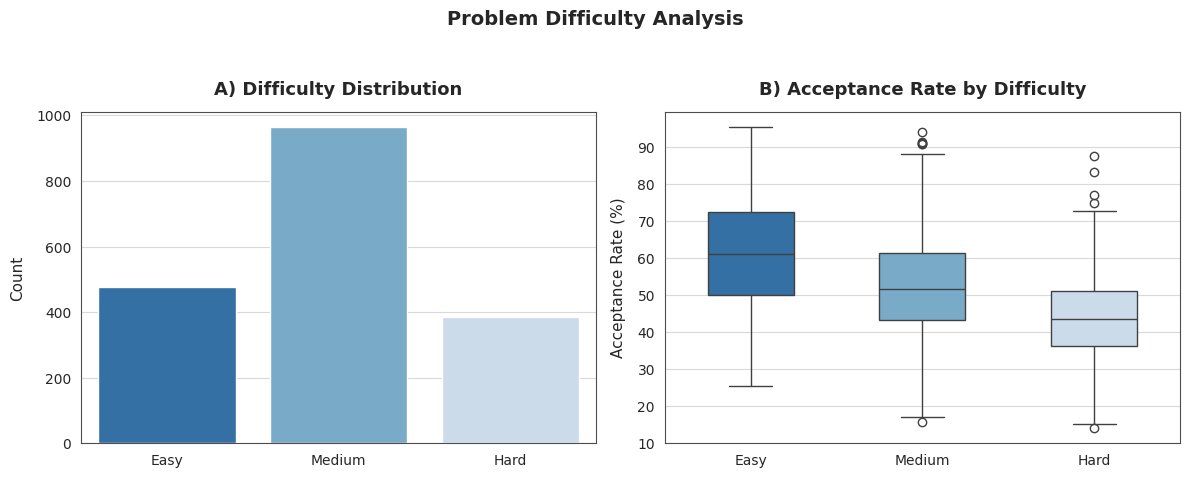

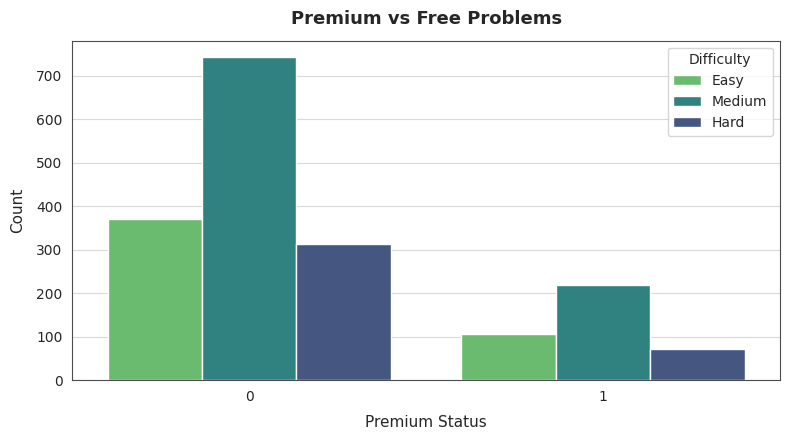

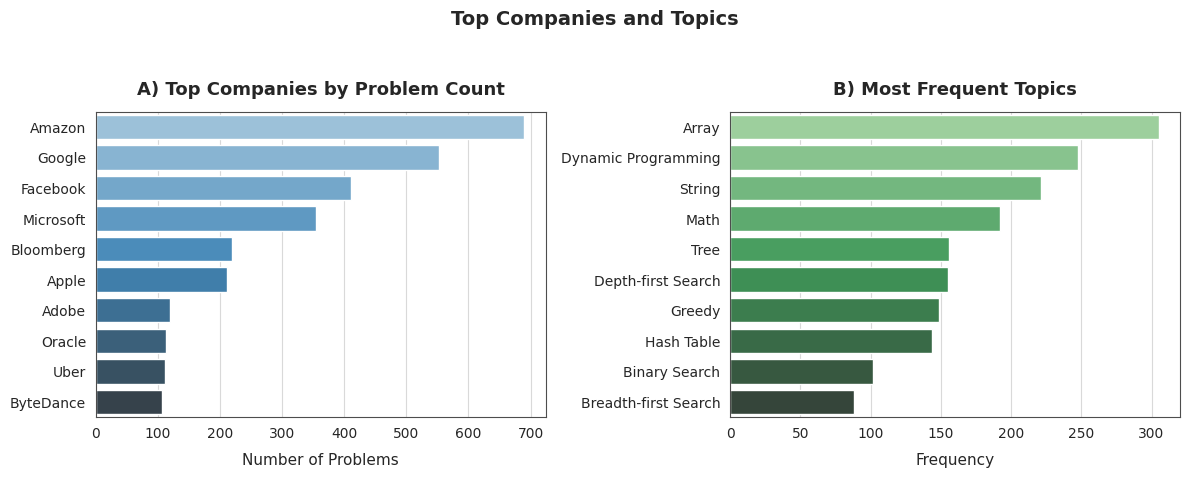

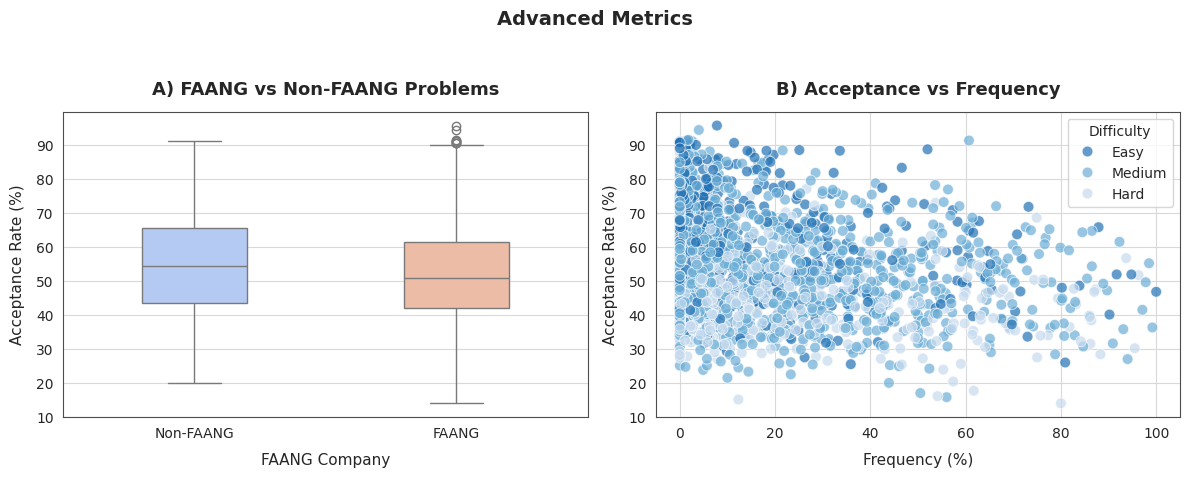

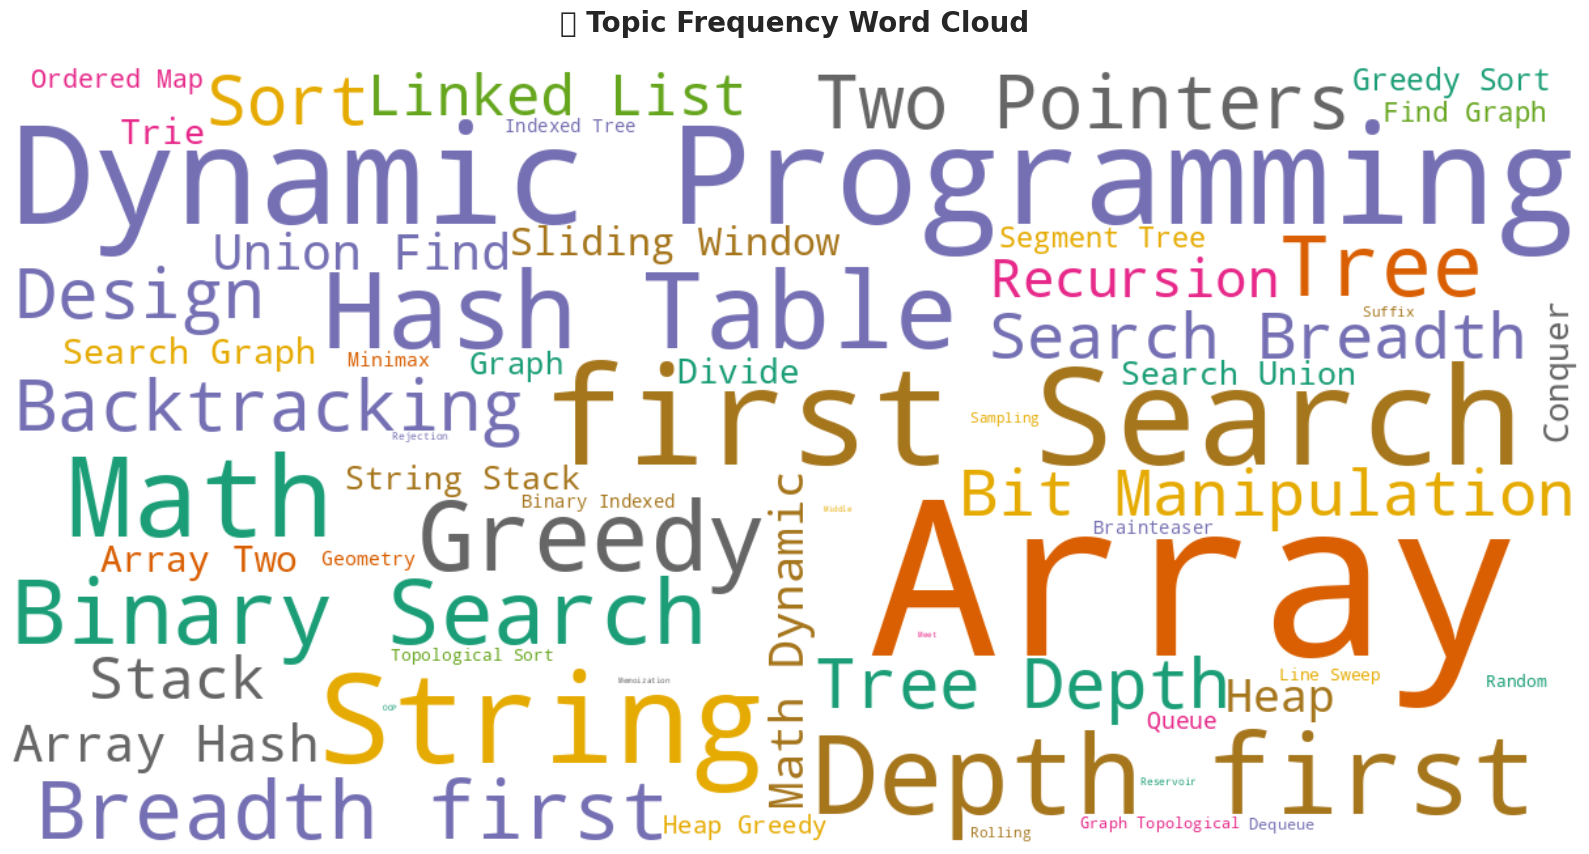

In [ ]:
# ========================
# 3. VISUALIZATIONS (PROFESSIONAL STYLE)
# ========================
# Set global style parameters
sns.set_style("whitegrid", {
    'axes.edgecolor': '0.3',
    'axes.labelcolor': '0.15',
    'text.color': '0.15',
    'grid.color': '0.85'
})
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Color palette
PALETTE = sns.color_palette("Blues_r", n_colors=3)
CONTRAST_PALETTE = sns.color_palette("viridis_r", n_colors=3)

# ===== FIGURE 1: CORE METRICS =====
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
fig1.suptitle('Problem Difficulty Analysis', y=1.05, fontsize=14, weight='bold')

# Plot 1: Difficulty Distribution (fixed warning)
sns.countplot(data=df, x='difficulty', hue='difficulty', ax=ax1, palette=PALETTE,
              hue_order=['Easy', 'Medium', 'Hard'], legend=False)
ax1.set_title('A) Difficulty Distribution', pad=12, weight='semibold')
ax1.set_xlabel('')
ax1.set_ylabel('Count', labelpad=8)

# Plot 2: Acceptance Rate (fixed warning)
sns.boxplot(data=df, x='difficulty', y='acceptance_rate', hue='difficulty', ax=ax2,
            palette=PALETTE, hue_order=['Easy', 'Medium', 'Hard'],
            width=0.5, linewidth=1, legend=False)
ax2.set_title('B) Acceptance Rate by Difficulty', pad=12, weight='semibold')
ax2.set_xlabel('')
ax2.set_ylabel('Acceptance Rate (%)', labelpad=8)

plt.tight_layout()
plt.show()
print()

# ===== FIGURE 2: PREMIUM ANALYSIS =====
plt.figure(figsize=(8, 4.5))
sns.countplot(data=df, x='is_premium', hue='difficulty',
             palette=CONTRAST_PALETTE, hue_order=['Easy', 'Medium', 'Hard'])
plt.title('Premium vs Free Problems', pad=12, weight='semibold')
plt.xlabel('Premium Status', labelpad=8)
plt.ylabel('Count', labelpad=8)
plt.legend(title='Difficulty', frameon=True)
plt.tight_layout()
plt.show()
print()

# ===== FIGURE 3: TOP ENTITIES =====
fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4.5))
fig3.suptitle('Top Companies and Topics', y=1.05, fontsize=14, weight='bold')

# Plot 3: Top Companies (fixed warning)
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index,
            ax=ax3, palette="Blues_d", saturation=0.85, legend=False, dodge=False)
ax3.set_title('A) Top Companies by Problem Count', pad=12, weight='semibold')
ax3.set_xlabel('Number of Problems', labelpad=8)
ax3.set_ylabel('')
print()

# Plot 4: Top Topics (fixed warning)
sns.barplot(x=top_topics.values, y=top_topics.index, hue=top_topics.index,
            ax=ax4, palette="Greens_d", saturation=0.85, legend=False, dodge=False)
ax4.set_title('B) Most Frequent Topics', pad=12, weight='semibold')
ax4.set_xlabel('Frequency', labelpad=8)
ax4.set_ylabel('')

plt.tight_layout()
plt.show()
print()

# ===== FIGURE 4: ADVANCED ANALYSIS =====
fig4, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 4.5))
fig4.suptitle('Advanced Metrics', y=1.05, fontsize=14, weight='bold')
print()

# Plot 5: FAANG Analysis (fixed warning)
df['is_faang'] = df['companies'].apply(lambda x: 1 if any(c in x for c in ['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google']) else 0)
sns.boxplot(data=df, x='is_faang', y='acceptance_rate', hue='is_faang',
            ax=ax5, palette="coolwarm", width=0.4, linewidth=1, legend=False)
ax5.set_title('A) FAANG vs Non-FAANG Problems', pad=12, weight='semibold')
ax5.set_xlabel('FAANG Company', labelpad=8)
ax5.set_ylabel('Acceptance Rate (%)', labelpad=8)
ax5.set_xticks([0, 1])  # First set tick positions
ax5.set_xticklabels(['Non-FAANG', 'FAANG'])  # Then set labels

print()

# Plot 6: Engagement
sns.scatterplot(data=df, x='frequency', y='acceptance_rate', hue='difficulty',
               palette=PALETTE, hue_order=['Easy', 'Medium', 'Hard'],
               ax=ax6, alpha=0.7, s=60)
ax6.set_title('B) Acceptance vs Frequency', pad=12, weight='semibold')
ax6.set_xlabel('Frequency (%)', labelpad=8)
ax6.set_ylabel('Acceptance Rate (%)', labelpad=8)
ax6.legend(title='Difficulty', frameon=True)

plt.tight_layout()
plt.show()
print()

# ===== WORD CLOUD =====
# Prepare text for the word cloud
all_topics = ' '.join([topic for sublist in df['related_topics'] for topic in sublist])

# Generate word cloud with a better colormap
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='Dark2',  # Visually appealing, modern
    max_words=100,
    prefer_horizontal=0.9,
    contour_color='black',
    contour_width=1
).generate(all_topics)

# Plotting
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('🔍 Topic Frequency Word Cloud', fontsize=20, weight='bold', pad=20)
plt.tight_layout()
plt.show()


# **5. LeetCodeHelper Engine**

Description:
Implementation of the LeetCodeHelper class, which includes a rich suite of methods designed to automate, recommend, and analyze interview problem sets:

    class LeetCodeHelper:
    
    #1. get_most_important_topics() → Top N topics for interviews  
    #2. recommend_problems_for_topics() → Filter by difficulty/company  
    #3. recommend_optimal_n_problems() → Balanced problem set  
    #4. generate_learning_pathway() → Structured topic mastery  
    #5. analyze_actual_difficulty() → Label vs. empirical difficulty  
    #6. predict_premium_value() → Identify high-value free problems  
    #7. recommend_company_specific() → FAANG-focused problems  
    #8. evaluate_problem_statement_quality() → Clarity scoring  
    #9. find_problem_clusters() → Auto-group similar problems  
    #10. create_interview_simulation() → Timed mock interview  
    #11. recommend_daily_practice() → Personalized study plan  
    #12. visualize_topic_network() → Topic relationships  
    #13. adaptive_learning_plan() → Dynamic roadmap

In [ ]:
#=================================================
# FINAL CODE
#=================================================

class LeetCodeHelper:
    """Comprehensive LeetCode problem selection and optimization engine"""

    def __init__(self, data, premium_model, difficulty_model=None, gmm_model=None):
        """Initialize with dataset and models"""
        self.df = data
        self.premium_model = premium_model
        self.difficulty_model = difficulty_model
        self.gmm_model = gmm_model

        # Apply feature engineering to ensure all needed features are available
        self.df = self._apply_feature_engineering(self.df)

        # Cache for topic importance
        self._topic_importance = self._calculate_topic_importance()

        # Cache for problem quality scores
        self._quality_scores = self._calculate_problem_quality()

        print(f"LeetCode Helper initialized with {len(self.df)} problems")

    def _apply_feature_engineering(self, df):
        """Apply essential feature engineering for recommendations"""
        # Ensure all critical features exist
        if 'engagement_ratio' not in df.columns:
            df['engagement_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)

        if 'popularity_score' not in df.columns:
            df['popularity_score'] = np.log1p(df['likes']) - 0.5 * np.log1p(df['dislikes'])

        if 'quality_score' not in df.columns:
            df['quality_score'] = (df['likes'] - df['dislikes']) / (df['likes'] + df['dislikes'] + 1)

        # Add company indicators
        top_companies = ['Amazon', 'Google', 'Facebook', 'Microsoft', 'Apple']
        for company in top_companies:
            df[f'has_{company.lower()}'] = df['companies'].fillna('').str.contains(company, case=False).astype(int)

        # Handling missing values
        for col in ['acceptance_rate', 'frequency']:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].median())

        # Parse topics to list format for easier handling
        df['topic_list'] = df['related_topics'].fillna('').str.split(',')

        # Add difficulty numeric
        difficulty_map = {'Easy': 1, 'Medium': 2, 'Hard': 3}
        df['difficulty_numeric'] = df['difficulty'].map(difficulty_map)

        return df

    def _calculate_topic_importance(self):
        """Calculate importance score for each topic based on frequency and company interest"""
        topic_counts = {}
        company_topic_counts = {}

        # Count overall topic frequency
        for topics in self.df['topic_list']:
            for topic in topics:
                if topic:  # Skip empty topics
                    topic_counts[topic] = topic_counts.get(topic, 0) + 1

        # Count topics asked by top companies
        top_company_mask = (
            (self.df['has_amazon'] == 1) |
            (self.df['has_google'] == 1) |
            (self.df['has_facebook'] == 1) |
            (self.df['has_microsoft'] == 1) |
            (self.df['has_apple'] == 1)
        )

        for topics in self.df.loc[top_company_mask, 'topic_list']:
            for topic in topics:
                if topic:  # Skip empty topics
                    company_topic_counts[topic] = company_topic_counts.get(topic, 0) + 1

        # Calculate importance score (normalized)
        total_problems = len(self.df)
        total_company_problems = top_company_mask.sum()

        topic_importance = {}
        for topic in topic_counts:
            # Base importance: frequency in dataset
            base_importance = topic_counts[topic] / total_problems

            # Company importance: frequency in top company problems
            company_importance = company_topic_counts.get(topic, 0) / total_company_problems if total_company_problems > 0 else 0

            # Combined score: weight company importance higher
            topic_importance[topic] = 0.4 * base_importance + 0.6 * company_importance

        return topic_importance

    def _calculate_problem_quality(self):
        """Calculate comprehensive quality score for each problem"""
        quality_scores = {}

        for idx, row in self.df.iterrows():
            # Base quality from user feedback
            like_ratio = row['engagement_ratio']

            # Frequency importance
            freq_factor = min(1.0, row['frequency'] / 50)  # Normalize frequency up to 50

            # Acceptance rate factor - moderate difficulty is ideal for learning
            # Creating a bell curve centered at 50% acceptance rate
            acc_rate = row['acceptance_rate'] / 100
            acc_factor = 1 - 2 * abs(acc_rate - 0.5)  # Peaks at 50% acceptance rate

            # Company factor
            company_factor = 0.1 * sum([
                row.get('has_amazon', 0),
                row.get('has_google', 0),
                row.get('has_facebook', 0),
                row.get('has_microsoft', 0),
                row.get('has_apple', 0)
            ])
            company_factor = min(1.0, company_factor)  # Cap at 1.0

            # Topic importance factor
            topic_importance = 0
            for topic in row['topic_list']:
                if topic:  # Skip empty topics
                    topic_importance += self._topic_importance.get(topic, 0)
            topic_factor = min(1.0, topic_importance)  # Cap at 1.0

            # Combined quality score - weighted average
            quality = (
                0.35 * like_ratio +      # User satisfaction
                0.25 * freq_factor +     # Frequency
                0.15 * acc_factor +      # Learning value
                0.15 * company_factor +  # Industry relevance
                0.10 * topic_factor      # Topic importance
            )

            quality_scores[row['id']] = quality

        # Add to dataframe
        self.df['optimized_quality'] = self.df['id'].map(quality_scores)

        return quality_scores

    def get_most_important_topics(self, n=10):
        """Return the most important topics to focus on"""
        # Sort topics by importance score
        sorted_topics = sorted(
            self._topic_importance.items(),
            key=lambda x: x[1],
            reverse=True
        )

        result = []
        for topic, score in sorted_topics[:n]:
            # Get total problem count
            problem_count = sum(1 for topics in self.df['topic_list'] if topic in topics)

            # Get company interest
            top_company_mask = (
                (self.df['has_amazon'] == 1) |
                (self.df['has_google'] == 1) |
                (self.df['has_facebook'] == 1) |
                (self.df['has_microsoft'] == 1) |
                (self.df['has_apple'] == 1)
            )
            company_problems = sum(1 for topics, mask in zip(self.df['topic_list'], top_company_mask)
                                if mask and topic in topics)

            result.append({
                'topic': topic,
                'importance_score': round(score, 4),
                'total_problems': problem_count,
                'top_company_problems': company_problems,
                'company_percentage': round(company_problems / problem_count * 100, 1) if problem_count > 0 else 0
            })

        return result

    def recommend_problems_for_topics(self, topics, n=5, difficulty=None, premium_only=False):
        """Recommend top problems for specific topics"""
        if isinstance(topics, str):
            topics = [topics]  # Convert single topic to list

        # Create a mask for problems containing any of the topics
        topic_mask = self.df['topic_list'].apply(lambda x: any(topic in x for topic in topics))

        # Apply additional filters
        if difficulty:
            topic_mask &= (self.df['difficulty'] == difficulty)

        if premium_only:
            topic_mask &= (self.df['is_premium'] == 1)

        # Get candidate problems
        candidates = self.df[topic_mask].copy()

        if len(candidates) == 0:
            return []

        # Sort by quality score
        candidates = candidates.sort_values('optimized_quality', ascending=False)

        # Return top N with relevant info
        result = []
        for _, row in candidates.head(n).iterrows():
            result.append({
                'id': row['id'],
                'title': row['title'],
                'difficulty': row['difficulty'],
                'acceptance_rate': row['acceptance_rate'],
                'frequency': row['frequency'],
                'topics': [t for t in row['topic_list'] if t],
                'quality_score': round(row['optimized_quality'], 3),
                'is_premium': bool(row['is_premium']),
                'companies': row['companies']
            })

        return result

    def recommend_optimal_n_problems(self, n=50, company=None):
        """Recommend the optimal N problems to solve for maximum learning value"""
        candidates = self.df.copy()

        # Apply company filter if specified
        if company:
            company_lower = company.lower()
            if f'has_{company_lower}' in candidates.columns:
                candidates = candidates[candidates[f'has_{company_lower}'] == 1]
            else:
                candidates = candidates[candidates['companies'].str.contains(company, case=False, na=False)]

        # Initialize topic coverage and difficulty distribution
        target_topic_coverage = Counter()
        selected_problem_ids = set()
        selected_problems = []

        # Initial important topics to ensure coverage
        important_topics = set([t['topic'] for t in self.get_most_important_topics(15)])

        # Target difficulty distribution: 30% Easy, 50% Medium, 20% Hard
        target_difficulty = {'Easy': 0.3, 'Medium': 0.5, 'Hard': 0.2}
        difficulty_count = {'Easy': 0, 'Medium': 0, 'Hard': 0}

        # First pass: select top problems by quality ensuring topic coverage
        remaining = n

        # Sort by quality
        candidates = candidates.sort_values('optimized_quality', ascending=False)

        for _, row in candidates.iterrows():
            if len(selected_problems) >= n:
                break

            # Skip if already selected
            if row['id'] in selected_problem_ids:
                continue

            problem_topics = set([t for t in row['topic_list'] if t])

            # Prioritize important topics that aren't well covered
            important_topic_coverage = [t for t in problem_topics if t in important_topics and target_topic_coverage[t] < 3]

            # Check difficulty distribution
            difficulty = row['difficulty']
            current_total = sum(difficulty_count.values())

            if current_total > 0:
                current_ratio = difficulty_count[difficulty] / current_total
                target_ratio = target_difficulty[difficulty]
            else:
                current_ratio = 0
                target_ratio = target_difficulty[difficulty]

            # Selection criteria combining topic coverage and difficulty distribution
            should_select = False

            # Always select first few high-quality problems
            if len(selected_problems) < 10:
                should_select = True
            # Then prioritize topic coverage
            elif len(important_topic_coverage) > 0:
                should_select = True
            # Then ensure difficulty distribution
            elif current_ratio < target_ratio:
                should_select = True

            if should_select:
                selected_problem_ids.add(row['id'])

                # Update topic coverage
                for topic in problem_topics:
                    target_topic_coverage[topic] += 1

                # Update difficulty count
                difficulty_count[difficulty] += 1

                # Add to selected problems
                selected_problems.append({
                    'id': row['id'],
                    'title': row['title'],
                    'difficulty': row['difficulty'],
                    'acceptance_rate': row['acceptance_rate'],
                    'frequency': row['frequency'],
                    'topics': list(problem_topics),
                    'quality_score': round(row['optimized_quality'], 3),
                    'is_premium': bool(row['is_premium']),
                    'companies': row['companies']
                })

        # Analysis of selected problems
        topic_coverage = Counter()
        for problem in selected_problems:
            for topic in problem['topics']:
                topic_coverage[topic] += 1

        top_topics = topic_coverage.most_common(10)

        summary = {
            'total_selected': len(selected_problems),
            'difficulty_distribution': {
                k: {'count': v, 'percentage': round(v/n*100, 1)}
                for k, v in difficulty_count.items()
            },
            'topic_coverage': {topic: count for topic, count in top_topics},
            'premium_count': sum(1 for p in selected_problems if p['is_premium']),
            'free_count': sum(1 for p in selected_problems if not p['is_premium']),
        }

        return {
            'problems': selected_problems,
            'summary': summary
        }

    def generate_learning_pathway(self, target_topic, include_prerequisites=True):
        """Generate an optimal learning pathway for a specific topic"""
        # Identify if the target topic has natural prerequisites
        prerequisites = self._identify_prerequisites(target_topic)

        pathway = []

        # Add prerequisites if requested
        if include_prerequisites and prerequisites:
            for prereq in prerequisites:
                # Get beginner-friendly problems for prerequisite
                prereq_problems = self.recommend_problems_for_topics(
                    prereq,
                    n=2,
                    difficulty='Easy'
                )

                if prereq_problems:
                    pathway.append({
                        'stage': f'Prerequisite: {prereq}',
                        'description': f'Build foundation in {prereq} before tackling {target_topic}',
                        'problems': prereq_problems
                    })

        # Main topic pathway - structured by difficulty
        for difficulty, count, description in [
            ('Easy', 3, 'Fundamentals'),
            ('Medium', 5, 'Core Concepts'),
            ('Hard', 2, 'Advanced Applications')
        ]:
            problems = self.recommend_problems_for_topics(
                target_topic,
                n=count,
                difficulty=difficulty
            )

            if problems:
                pathway.append({
                    'stage': f'{description} ({difficulty})',
                    'description': self._get_stage_description(target_topic, difficulty),
                    'problems': problems
                })

        # Add related topics for expansion
        related = self._find_related_topics(target_topic)
        if related:
            related_problems = []
            for topic in related[:2]:  # Top 2 related topics
                problems = self.recommend_problems_for_topics(
                    topic,
                    n=1,
                    difficulty='Medium'
                )
                related_problems.extend(problems)

            if related_problems:
                pathway.append({
                    'stage': 'Expand Your Knowledge',
                    'description': f'Explore topics commonly paired with {target_topic}',
                    'problems': related_problems
                })

        return {
            'topic': target_topic,
            'pathway': pathway,
            'prerequisites': prerequisites,
            'related_topics': related
        }

    def _identify_prerequisites(self, topic):
        """Identify natural prerequisites for a topic"""
        # Define known prerequisite relationships
        prereq_map = {
            'Dynamic Programming': ['Array', 'Recursion'],
            'Graph': ['Breadth-first Search', 'Depth-first Search'],
            'Tree': ['Recursion', 'Depth-first Search'],
            'Backtracking': ['Recursion', 'Array'],
            'Binary Search Tree': ['Tree', 'Binary Search'],
            'Sliding Window': ['Array', 'String', 'Two Pointers'],
            'Trie': ['Tree', 'String'],
            'Union Find': ['Graph'],
            'Segment Tree': ['Tree', 'Binary Search'],
            'Topological Sort': ['Graph', 'Depth-first Search']
        }

        return prereq_map.get(topic, [])

    def _find_related_topics(self, topic):
        """Find topics commonly paired with the target topic"""
        # Count co-occurrence with other topics
        co_occurrence = Counter()
        topic_rows = self.df[self.df['topic_list'].apply(lambda x: topic in x)]

        for topics in topic_rows['topic_list']:
            for t in topics:
                if t and t != topic:
                    co_occurrence[t] += 1

        # Return top related topics
        return [t for t, _ in co_occurrence.most_common(5)]

    def _get_stage_description(self, topic, difficulty):
        """Generate description for a learning stage"""
        if difficulty == 'Easy':
            return f"Master the basics of {topic} with these entry-level problems"
        elif difficulty == 'Medium':
            return f"Build deeper knowledge of {topic} techniques and patterns"
        else:  # Hard
            return f"Challenge yourself with advanced {topic} concepts"

    def analyze_actual_difficulty(self):
        """Analyze actual difficulty versus labeled difficulty"""
        # Create a DataFrame for analysis
        difficulty_analysis = self.df[['id', 'title', 'difficulty', 'acceptance_rate', 'frequency', 'likes', 'dislikes']].copy()

        # Calculate actual difficulty score based on acceptance rate and other metrics
        # Lower acceptance rate = harder problem
        difficulty_analysis['acceptance_factor'] = 100 - difficulty_analysis['acceptance_rate']

        # Higher like-to-dislike ratio for a given acceptance rate can indicate well-designed problems
        difficulty_analysis['like_dislike_ratio'] = difficulty_analysis['likes'] / (difficulty_analysis['dislikes'] + 1)

        # Normalize like-dislike ratio
        max_ratio = difficulty_analysis['like_dislike_ratio'].max()
        difficulty_analysis['normalized_ratio'] = difficulty_analysis['like_dislike_ratio'] / max_ratio

        # Calculate actual difficulty score (0-100)
        # Higher score = harder problem
        difficulty_analysis['actual_difficulty_score'] = (
            0.7 * difficulty_analysis['acceptance_factor'] +  # Acceptance rate is the main factor
            0.1 * difficulty_analysis['frequency'] +          # More frequent problems tend to be more important
            0.2 * (1 - difficulty_analysis['normalized_ratio'])  # Lower like-dislike ratio suggests harder/less clear problems
        )

        # Normalize to 0-100 scale
        min_score = difficulty_analysis['actual_difficulty_score'].min()
        max_score = difficulty_analysis['actual_difficulty_score'].max()
        difficulty_analysis['actual_difficulty_score'] = 100 * (difficulty_analysis['actual_difficulty_score'] - min_score) / (max_score - min_score)

        # Map labeled difficulty to numeric for comparison
        difficulty_map = {'Easy': 1, 'Medium': 2, 'Hard': 3}
        difficulty_analysis['difficulty_numeric'] = difficulty_analysis['difficulty'].map(difficulty_map)

        # Define expected score ranges for each difficulty
        # Easy: 0-33, Medium: 34-66, Hard: 67-100
        def expected_difficulty(score):
            if score < 33:
                return 'Easy'
            elif score < 67:
                return 'Medium'
            else:
                return 'Hard'

        difficulty_analysis['predicted_difficulty'] = difficulty_analysis['actual_difficulty_score'].apply(expected_difficulty)
        difficulty_analysis['matches_label'] = difficulty_analysis['predicted_difficulty'] == difficulty_analysis['difficulty']

        # Find mismatched problems
        mismatched = difficulty_analysis[~difficulty_analysis['matches_label']].copy()

        # Calculate how many levels off
        level_diff_map = {
            ('Easy', 'Medium'): 1,
            ('Medium', 'Easy'): -1,
            ('Medium', 'Hard'): 1,
            ('Hard', 'Medium'): -1,
            ('Easy', 'Hard'): 2,
            ('Hard', 'Easy'): -2
        }

        mismatched['level_difference'] = mismatched.apply(
            lambda x: level_diff_map.get((x['difficulty'], x['predicted_difficulty']), 0),
            axis=1
        )

        # Categorize mismatches
        mismatched['mismatch_type'] = mismatched['level_difference'].apply(
            lambda x: 'Too Easy' if x < 0 else 'Too Hard'
        )

        # Summary statistics
        match_rate = difficulty_analysis['matches_label'].mean() * 100

        # Gather results
        result = {
            'match_rate': round(match_rate, 1),
            'mismatched_count': len(mismatched),
            'mismatched_by_type': mismatched['mismatch_type'].value_counts().to_dict(),
            'difficulty_distribution': {
                'labeled': difficulty_analysis['difficulty'].value_counts().to_dict(),
                'predicted': difficulty_analysis['predicted_difficulty'].value_counts().to_dict()
            },
            'notable_mismatches': {
                'too_easy': [],
                'too_hard': []
            }
        }

        # Find notable mismatches (significant discrepancy)
        too_easy = mismatched[mismatched['level_difference'] < 0].sort_values('level_difference').head(5)
        too_hard = mismatched[mismatched['level_difference'] > 0].sort_values('level_difference', ascending=False).head(5)

        for _, row in too_easy.iterrows():
            result['notable_mismatches']['too_easy'].append({
                'id': row['id'],
                'title': row['title'],
                'labeled_difficulty': row['difficulty'],
                'predicted_difficulty': row['predicted_difficulty'],
                'acceptance_rate': row['acceptance_rate'],
                'difficulty_score': round(row['actual_difficulty_score'], 1)
            })

        for _, row in too_hard.iterrows():
            result['notable_mismatches']['too_hard'].append({
                'id': row['id'],
                'title': row['title'],
                'labeled_difficulty': row['difficulty'],
                'predicted_difficulty': row['predicted_difficulty'],
                'acceptance_rate': row['acceptance_rate'],
                'difficulty_score': round(row['actual_difficulty_score'], 1)
            })

        return result

    def predict_premium_value(self, problem_ids=None):
        """Predict which free problems have high premium potential"""
        if not self.premium_model:
            return {"error": "Premium prediction model not available"}

        # If no specific IDs provided, analyze all free problems
        if problem_ids is None:
            candidates = self.df[self.df['is_premium'] == 0].copy()
        else:
            candidates = self.df[self.df['id'].isin(problem_ids)].copy()

        if len(candidates) == 0:
            return {"error": "No matching problems found"}



        # Features used for prediction
        features = ['acceptance_rate', 'frequency', 'likes', 'dislikes', 'engagement_ratio',
                    'like_to_dislike_ratio', 'popularity_score', 'community_engagement',
                    'overall_quality', 'company_count', 'topic_count', 'is_asked_by_top_company']

        # Ensure all features exist
        for feature in features:
            if feature not in candidates.columns:
                # If a feature is missing, calculate it or handle the error
                if feature == 'engagement_ratio':
                    candidates['engagement_ratio'] = candidates['likes'] / (candidates['likes'] + candidates['dislikes'] + 1)
                elif feature == 'like_to_dislike_ratio':
                    candidates['like_to_dislike_ratio'] = candidates['likes'] / (candidates['dislikes'] + 1)
                elif feature == 'popularity_score':
                    candidates['popularity_score'] = np.log1p(candidates['likes']) - 0.5 * np.log1p(candidates['dislikes'])
                elif feature == 'community_engagement':
                    candidates['community_engagement'] = candidates['discuss_count'] / candidates['likes']
                elif feature == 'overall_quality':
                    candidates['overall_quality'] = (candidates['likes'] - candidates['dislikes']) / (candidates['likes'] + candidates['dislikes'] + 1)
                elif feature == 'company_count':
                    candidates['company_count'] = candidates['companies'].fillna('').str.count(',') + candidates['companies'].fillna('').str.len().clip(0, 1)
                elif feature == 'topic_count':
                    candidates['topic_count'] = candidates['related_topics'].fillna('').str.count(',') + candidates['related_topics'].fillna('').str.len().clip(0, 1)
                elif feature == 'is_asked_by_top_company':
                    candidates['is_asked_by_top_company'] = candidates['asked_by_faang']  # Assuming 'asked_by_faang' is available
                else:
                    return {"error": f"Required feature '{feature}' not found in dataset"}

        # Scale features
        from sklearn.preprocessing import StandardScaler  # Import StandardSc
        scaler = StandardScaler()
        X = scaler.fit_transform(candidates[features])

        # Predict premium probability
        premium_proba = self.premium_model.predict_proba(X)[:, 1]
        candidates['premium_probability'] = premium_proba

        # Sort by premium probability
        candidates = candidates.sort_values('premium_probability', ascending=False)

        # Return top candidates
        result = {
            "high_value_problems": [],
            "average_premium_probability": round(premium_proba.mean() * 100, 2)
        }

        for _, row in candidates.head(10).iterrows():
            result["high_value_problems"].append({
                'id': row['id'],
                'title': row['title'],
                'difficulty': row['difficulty'],
                'premium_probability': round(row['premium_probability'] * 100, 2),
                'frequency': row['frequency'],
                'topics': [t for t in row['topic_list'] if t],
                'companies': row['companies']
            })

        return result

    def recommend_company_specific(self, company, n=10):
        """Generate company-specific problem recommendations"""
        company_lower = company.lower()

        # Check if company exists in our dataset
        if f'has_{company_lower}' in self.df.columns:
            # Use pre-computed company indicator
            candidates = self.df[self.df[f'has_{company_lower}'] == 1].copy()
        else:
            # Fall back to string matching
            candidates = self.df[self.df['companies'].str.contains(company, case=False, na=False)].copy()

        if len(candidates) == 0:
            return {"error": f"No problems found for company: {company}"}

        # Analyze company's topic focus
        all_topics = []
        for topics in candidates['topic_list']:
            all_topics.extend([t for t in topics if t])

        topic_counts = Counter(all_topics)
        top_topics = topic_counts.most_common(5)

        # Analyze difficulty distribution
        difficulty_dist = candidates['difficulty'].value_counts(normalize=True).to_dict()

        # Find most distinctive topics compared to overall dataset
        all_df_topics = []
        for topics in self.df['topic_list']:
            all_df_topics.extend([t for t in topics if t])
        all_topic_counts = Counter(all_df_topics)

        # Calculate topic distinctiveness
        distinctive_topics = {}
        total_company = len(candidates)
        total_all = len(self.df)

        for topic, count in topic_counts.items():
            company_freq = count / total_company
            overall_freq = all_topic_counts.get(topic, 0) / total_all

            # How much more frequently this company asks this topic
            if overall_freq > 0:
                distinctiveness = company_freq / overall_freq
                distinctive_topics[topic] = distinctiveness

        # Sort by distinctiveness
        distinctive_topics = sorted(distinctive_topics.items(), key=lambda x: x[1], reverse=True)
        distinctive_topics = [t for t, s in distinctive_topics if s > 1.5][:5]  # At least 50% more common

        # Sort by quality and frequency for this company
        candidates = candidates.sort_values(['frequency', 'optimized_quality'], ascending=[False, False])

        # Prepare result
        result = {
            "company": company,
            "total_problems": len(candidates),
            "difficulty_distribution": {k: round(v*100, 1) for k, v in difficulty_dist.items()},
            "top_topics": [{"topic": t, "count": c} for t, c in top_topics],
            "distinctive_topics": distinctive_topics,
            "recommended_problems": []
        }

        # Add top recommended problems
        for _, row in candidates.head(n).iterrows():
            result["recommended_problems"].append({
                'id': row['id'],
                'title': row['title'],
                'difficulty': row['difficulty'],
                'frequency': row['frequency'],
                'acceptance_rate': row['acceptance_rate'],
                'topics': [t for t in row['topic_list'] if t],
                'quality_score': round(row['optimized_quality'], 3)
            })

        return result

    def evaluate_problem_statement_quality(self, problem_ids=None):
        """Evaluate the quality of problem statements"""
        # Since we don't have access to actual problem statement text,
        # we'll use proxies like like-to-dislike ratio and acceptance rate

        if problem_ids:
            candidates = self.df[self.df['id'].isin(problem_ids)].copy()
        else:
            # Analyze a random sample of 100 problems
            candidates = self.df.sample(min(100, len(self.df))).copy()

        if len(candidates) == 0:
            return {"error": "No matching problems found"}

        # Calculate clarity metrics
        candidates['like_dislike_ratio'] = candidates['likes'] / (candidates['dislikes'] + 1)

        # We'll create a clarity score based on:
        # 1. Like-to-dislike ratio (higher is better)
        # 2. Acceptance rate (very low might indicate unclear statements)
        # 3. Consistency between acceptance rate and difficulty level

        # Normalize like-dislike ratio
        max_ratio = candidates['like_dislike_ratio'].max()
        candidates['normalized_ratio'] = candidates['like_dislike_ratio'] / max_ratio


        # For each difficulty level, we have different expectations for acceptance rate
        difficulty_adjustments = {
            'Easy': lambda x: 1 - abs(x - 0.65) / 0.65,  # Easy problems should have ~65% acceptance
            'Medium': lambda x: 1 - abs(x - 0.45) / 0.45,  # Medium ~45%
            'Hard': lambda x: 1 - abs(x - 0.30) / 0.30   # Hard ~30%
        }

        candidates['acc_clarity'] = candidates.apply(
            lambda row: difficulty_adjustments[row['difficulty']](row['acceptance_rate']/100),
            axis=1
        )

        # Calculate overall clarity score
        candidates['clarity_score'] = (
            0.6 * candidates['normalized_ratio'] +  # Like-dislike ratio is a strong indicator
            0.4 * candidates['acc_clarity']         # Acceptance rate adjusted for difficulty
        ) * 100  # Scale to 0-100

        # Categorize problem statement quality
        def quality_category(score):
            if score >= 80:
                return 'Excellent'
            elif score >= 60:
                return 'Good'
            elif score >= 40:
                return 'Average'
            else:
                return 'Needs Improvement'

        candidates['quality_category'] = candidates['clarity_score'].apply(quality_category)

        # Prepare results
        result = {
            "average_clarity_score": round(candidates['clarity_score'].mean(), 2),
            "quality_distribution": candidates['quality_category'].value_counts().to_dict(),
            "problem_evaluations": []
        }

        # Add detailed evaluations for each problem
        for _, row in candidates.iterrows():
            result["problem_evaluations"].append({
                'id': row['id'],
                'title': row['title'],
                'difficulty': row['difficulty'],
                'clarity_score': round(row['clarity_score'], 2),
                'quality_category': row['quality_category'],
                'like_dislike_ratio': round(row['like_dislike_ratio'], 2),
                'acceptance_rate': row['acceptance_rate'],
                'suggested_improvements': self._suggest_improvements(row)
            })

        return result

    def _suggest_improvements(self, problem_row):
        """Suggest improvements for problem statements based on metrics"""
        suggestions = []

        # Check for potential clarity issues
        if problem_row['clarity_score'] < 60:
            # Analyze potential issues
            if problem_row['like_dislike_ratio'] < 3:
                suggestions.append("Consider revising problem statement for clarity")

            if problem_row['acc_clarity'] < 0.5:
                if problem_row['acceptance_rate'] < 30:
                    suggestions.append("Problem may be more difficult than labeled or has unclear instructions")
                elif problem_row['acceptance_rate'] > 70 and problem_row['difficulty'] != 'Easy':
                    suggestions.append("Problem may be easier than labeled or has overly detailed instructions")

        # Default suggestions if none found
        if not suggestions:
            suggestions.append("No specific improvements needed")

        return suggestions

    def find_problem_clusters(self, n_clusters=5):
        """Find clusters of similar problems using unsupervised learning"""
        if not self.gmm_model:
            # If no pre-trained model, create a new clustering
            # Select features for clustering
            features = [
                'difficulty_numeric',
                'acceptance_rate',
                'frequency',
                'likes',
                'dislikes',
                'engagement_ratio'
            ]

            # Prepare data
            cluster_data = self.df[features].copy()

            # Standardize features
            scaler = StandardScaler()
            X = scaler.fit_transform(cluster_data)

            # Try different clustering methods
            results = {}

            # K-Means clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            kmeans_labels = kmeans.fit_predict(X)
            results['kmeans'] = {
                'labels': kmeans_labels,
                'silhouette': silhouette_score(X, kmeans_labels),
                'db_index': davies_bouldin_score(X, kmeans_labels),
                'ch_score': calinski_harabasz_score(X, kmeans_labels)
            }

            # Gaussian Mixture Model
            gmm = GaussianMixture(n_components=n_clusters, random_state=42)
            gmm_labels = gmm.fit_predict(X)
            results['gmm'] = {
                'labels': gmm_labels,
                'silhouette': silhouette_score(X, gmm_labels),
                'model': gmm
            }

            # Select best model based on silhouette score
            best_method = max(results.keys(), key=lambda k: results[k]['silhouette'])
            best_labels = results[best_method]['labels']

            # Store the GMM model for future use
            if best_method == 'gmm':
                self.gmm_model = results['gmm']['model']

        else:
            # Use pre-trained model
            features = [
                'difficulty_numeric',
                'acceptance_rate',
                'frequency',
                'likes',
                'dislikes',
                'engagement_ratio'
            ]

            # Prepare data
            cluster_data = self.df[features].copy()

            # Standardize features
            scaler = StandardScaler()
            X = scaler.fit_transform(cluster_data)

            # Use existing model
            best_labels = self.gmm_model.predict(X)

        # Add cluster labels to dataframe for analysis
        self.df['cluster'] = best_labels

        # Analyze clusters
        cluster_analysis = []

        for cluster_id in range(n_clusters):
            cluster_problems = self.df[self.df['cluster'] == cluster_id]

            # Calculate cluster characteristics
            difficulty_dist = cluster_problems['difficulty'].value_counts(normalize=True).to_dict()

            # Get topic distribution
            cluster_topics = []
            for topics in cluster_problems['topic_list']:
                cluster_topics.extend([t for t in topics if t])
            topic_counts = Counter(cluster_topics).most_common(5)

            # Calculate average metrics
            avg_metrics = {
                'acceptance_rate': cluster_problems['acceptance_rate'].mean(),
                'frequency': cluster_problems['frequency'].mean(),
                'like_ratio': cluster_problems['likes'].sum() / (cluster_problems['dislikes'].sum() + 1)
            }

            # Find representative problems
            representative_problems = cluster_problems.sort_values('optimized_quality', ascending=False).head(3)
            rep_list = []

            for _, row in representative_problems.iterrows():
                rep_list.append({
                    'id': row['id'],
                    'title': row['title'],
                    'difficulty': row['difficulty'],
                    'acceptance_rate': row['acceptance_rate'],
                    'topics': [t for t in row['topic_list'] if t]
                })

            # Create cluster profile
            cluster_analysis.append({
                'cluster_id': cluster_id,
                'size': len(cluster_problems),
                'difficulty_distribution': difficulty_dist,
                'top_topics': [{'topic': t, 'count': c} for t, c in topic_counts],
                'avg_metrics': {k: round(v, 2) for k, v in avg_metrics.items()},
                'representative_problems': rep_list,
                'suggested_label': self._suggest_cluster_label(difficulty_dist, topic_counts, avg_metrics)
            })

        return cluster_analysis

    def _suggest_cluster_label(self, difficulty_dist, topic_counts, metrics):
        """Suggest a descriptive label for a problem cluster"""
        # Determine primary difficulty
        primary_difficulty = max(difficulty_dist.items(), key=lambda x: x[1])[0]

        # Get top topic if available
        top_topic = topic_counts[0][0] if topic_counts else "Mixed"

        # Characterize by metrics
        if metrics['frequency'] > 40:
            frequency_char = "Popular"
        elif metrics['frequency'] < 10:
            frequency_char = "Niche"
        else:
            frequency_char = ""

        if metrics['acceptance_rate'] < 40:
            challenge_char = "Challenging"
        elif metrics['acceptance_rate'] > 65:
            challenge_char = "Approachable"
        else:
            challenge_char = ""

        # Combine characteristics
        characteristics = [c for c in [frequency_char, challenge_char] if c]
        char_str = " ".join(characteristics)

        if char_str:
            return f"{char_str} {primary_difficulty} {top_topic} Problems"
        else:
            return f"{primary_difficulty} {top_topic} Problems"

    def create_interview_simulation(self, difficulty_level='Medium', duration_minutes=60, company=None):
        """Create a realistic interview simulation with timed problems"""
        # Determine how many problems to include based on duration
        # Assume average Medium problem takes ~20 minutes
        if difficulty_level == 'Easy':
            avg_time = 15  # minutes
        elif difficulty_level == 'Medium':
            avg_time = 20  # minutes
        else:  # Hard
            avg_time = 30  # minutes

        num_problems = max(1, int(duration_minutes / avg_time))

        # Start with filter for difficulty
        candidates = self.df[self.df['difficulty'] == difficulty_level].copy()

        # Apply company filter if specified
        if company:
            company_lower = company.lower()
            if f'has_{company_lower}' in candidates.columns:
                candidates = candidates[candidates[f'has_{company_lower}'] == 1]
            else:
                candidates = candidates[candidates['companies'].str.contains(company, case=False, na=False)]

        if len(candidates) < num_problems:
            return {"error": f"Not enough {difficulty_level} problems available for selected criteria"}

        # Select problems that cover diverse topics
        selected_problems = []
        selected_topics = set()

        # Sort by quality and frequency
        candidates = candidates.sort_values(['frequency', 'optimized_quality'], ascending=[False, False])

        for _, row in candidates.iterrows():
            if len(selected_problems) >= num_problems:
                break

            problem_topics = set([t for t in row['topic_list'] if t])

            # Prefer problems that cover new topics
            if not selected_topics.intersection(problem_topics) or len(selected_problems) < num_problems/2:
                selected_problems.append({
                    'id': row['id'],
                    'title': row['title'],
                    'difficulty': row['difficulty'],
                    'estimated_time': f"{avg_time} minutes",
                    'acceptance_rate': row['acceptance_rate'],
                    'topics': list(problem_topics),
                    'companies': row['companies']
                })

                selected_topics.update(problem_topics)

        # Create structured interview plan
        interview_plan = {
            'duration': f"{duration_minutes} minutes",
            'difficulty': difficulty_level,
            'company_focus': company if company else "General",
            'problem_count': len(selected_problems),
            'covered_topics': list(selected_topics),
            'problems': selected_problems
        }

        # Add timing information
        total_time = 0
        for i, problem in enumerate(interview_plan['problems']):
            start_time = total_time
            end_time = start_time + avg_time
            problem['timing'] = f"{start_time}-{end_time} minutes"
            total_time = end_time

        return interview_plan

    def recommend_daily_practice(self, days=30, user_level='Medium', daily_problems=3, focus_topics=None):
        """Create a daily practice plan for consistent improvement"""
        # Define mix of problems based on user level
        if user_level == 'Beginner':
            mix = {'Easy': 0.7, 'Medium': 0.3, 'Hard': 0.0}
        elif user_level == 'Intermediate':
            mix = {'Easy': 0.3, 'Medium': 0.6, 'Hard': 0.1}
        else:  # Advanced
            mix = {'Easy': 0.1, 'Medium': 0.5, 'Hard': 0.4}

        # Calculate problem counts
        total_problems = days * daily_problems
        problem_counts = {
            difficulty: int(total_problems * ratio)
            for difficulty, ratio in mix.items()
        }

        # Adjust for rounding errors
        remaining = total_problems - sum(problem_counts.values())
        if remaining > 0:
            problem_counts[max(mix, key=mix.get)] += remaining

        # Get important topics if not specified
        if not focus_topics:
            important_topics = [t['topic'] for t in self.get_most_important_topics(10)]
        else:
            important_topics = focus_topics

        # Create daily plan
        daily_plan = []
        problems_used = set()

        for day in range(1, days + 1):
            # Determine which topics to focus on for this day
            # Cycle through important topics over time
            day_topic_indices = [(day + i) % len(important_topics) for i in range(3)]
            day_topics = [important_topics[i] for i in day_topic_indices]

            # Get problems for the day
            day_problems = []

            # For each difficulty in the mix
            for difficulty, target_count in problem_counts.items():
                # Calculate how many problems of this difficulty should be added by this day
                target_by_day = int(target_count * day / days)
                current_count = sum(1 for d in daily_plan for p in d['problems']
                                   if p['difficulty'] == difficulty)

                # How many to add today
                to_add = max(0, target_by_day - current_count)
                to_add = min(to_add, daily_problems - len(day_problems))

                if to_add > 0:
                    # Find problems matching difficulty and topics
                    for topic in day_topics:
                        candidates = self.df[
                            (self.df['difficulty'] == difficulty) &
                            (self.df['topic_list'].apply(lambda x: topic in x))
                        ]

                        # Filter out already used problems
                        candidates = candidates[~candidates['id'].isin(problems_used)]

                        # Sort by quality
                        candidates = candidates.sort_values('optimized_quality', ascending=False)

                        # Add problems
                        for _, row in candidates.head(to_add).iterrows():
                            if len(day_problems) < daily_problems and row['id'] not in problems_used:
                                day_problems.append({
                                    'id': row['id'],
                                    'title': row['title'],
                                    'difficulty': row['difficulty'],
                                    'topics': [t for t in row['topic_list'] if t],
                                    'focus_topic': topic
                                })
                                problems_used.add(row['id'])
                                to_add -= 1

                        if to_add <= 0 or len(day_problems) >= daily_problems:
                            break

            # Fill remaining slots with any good problems
            remaining_slots = daily_problems - len(day_problems)
            if remaining_slots > 0:
                # Find high-quality problems not yet used
                candidates = self.df[~self.df['id'].isin(problems_used)]
                candidates = candidates.sort_values('optimized_quality', ascending=False)

                for _, row in candidates.head(remaining_slots).iterrows():
                    day_problems.append({
                        'id': row['id'],
                        'title': row['title'],
                        'difficulty': row['difficulty'],
                        'topics': [t for t in row['topic_list'] if t]
                    })
                    problems_used.add(row['id'])

            # Add day to plan
            daily_plan.append({
                'day': day,
                'focus_topics': day_topics,
                'problems': day_problems
            })

        return {
            'user_level': user_level,
            'days': days,
            'daily_problems': daily_problems,
            'total_problems': total_problems,
            'difficulty_distribution': problem_counts,
            'focus_topics': important_topics,
            'daily_plan': daily_plan
        }

    def visualize_topic_network(self):
        """Create a network visualization of related topics"""
        # Extract all topics
        all_topics = set()
        for topics in self.df['topic_list']:
            all_topics.update([t for t in topics if t])

        # Build topic co-occurrence matrix
        topic_connections = {}

        for topics in self.df['topic_list']:
            valid_topics = [t for t in topics if t]
            for i, topic1 in enumerate(valid_topics):
                if topic1 not in topic_connections:
                    topic_connections[topic1] = {}

                for topic2 in valid_topics[i+1:]:
                    if topic2 not in topic_connections[topic1]:
                        topic_connections[topic1][topic2] = 0
                    topic_connections[topic1][topic2] += 1

                    if topic2 not in topic_connections:
                        topic_connections[topic2] = {}
                    if topic1 not in topic_connections[topic2]:
                        topic_connections[topic2][topic1] = 0
                    topic_connections[topic2][topic1] += 1

        # Calculate topic importance for node sizing
        topic_importance = self._topic_importance

        # Convert to network graph format
        nodes = []
        for topic in all_topics:
            # Calculate how many problems have this topic
            problem_count = sum(1 for topics in self.df['topic_list'] if topic in topics)

            nodes.append({
                'id': topic,
                'importance': topic_importance.get(topic, 0),
                'problem_count': problem_count
            })

        edges = []
        for topic1, connections in topic_connections.items():
            for topic2, weight in connections.items():
                if weight >= 5:  # Only include strong connections
                    edges.append({
                        'source': topic1,
                        'target': topic2,
                        'weight': weight
                    })

        # Find communities in the network
        # This is a simplified approach - we could use more sophisticated algorithms
        communities = {}
        visited = set()

        for node in nodes:
            topic = node['id']
            if topic in visited:
                continue

            # Start a new community
            community = {topic}
            visited.add(topic)

            # Add strongly connected topics
            if topic in topic_connections:
                connections = topic_connections[topic]
                for connected_topic, weight in connections.items():
                    if weight >= 10 and connected_topic not in visited:
                        community.add(connected_topic)
                        visited.add(connected_topic)

            # Add to communities
            community_name = f"Community {len(communities) + 1}"
            communities[community_name] = list(community)

        return {
            'nodes': nodes,
            'edges': edges,
            'communities': communities
        }

    def adaptive_learning_plan(self, user_profile, duration_weeks=4):
        """Create an adaptive learning plan based on user profile"""
        # Parse user profile
        known_topics = user_profile.get('known_topics', [])
        target_topics = user_profile.get('target_topics', [])
        skill_level = user_profile.get('skill_level', 'Intermediate')
        available_time = user_profile.get('hours_per_week', 10)
        target_companies = user_profile.get('target_companies', [])

        # If no target topics specified, recommend important ones
        if not target_topics:
            important_topics = self.get_most_important_topics(5)
            target_topics = [t['topic'] for t in important_topics]

        # Calculate problems per week based on available time
        # Assume average problem takes 20 minutes
        problems_per_week = int(available_time * 60 / 20)

        # Adjust difficulty distribution based on skill level
        if skill_level == 'Beginner':
            difficulty_dist = {'Easy': 0.7, 'Medium': 0.3, 'Hard': 0.0}
        elif skill_level == 'Intermediate':
            difficulty_dist = {'Easy': 0.2, 'Medium': 0.7, 'Hard': 0.1}
        else:  # Advanced
            difficulty_dist = {'Easy': 0.1, 'Medium': 0.5, 'Hard': 0.4}

        # Create plan structure
        learning_plan = {
            'user_profile': {
                'skill_level': skill_level,
                'hours_per_week': available_time,
                'known_topics': known_topics,
                'target_topics': target_topics,
                'target_companies': target_companies
            },
            'duration_weeks': duration_weeks,
            'problems_per_week': problems_per_week,
            'difficulty_distribution': difficulty_dist,
            'weekly_plan': []
        }

        # Create learning pathways for target topics
        topic_pathways = {}
        for topic in target_topics:
            pathway = self.generate_learning_pathway(topic, include_prerequisites=True)
            topic_pathways[topic] = pathway

        # Distribute topics across weeks
        topics_per_week = max(1, len(target_topics) // duration_weeks)

        for week in range(1, duration_weeks + 1):
            # Determine focus topics for the week
            week_topic_indices = [(week - 1) * topics_per_week + i for i in range(topics_per_week)]
            week_topic_indices = [i % len(target_topics) for i in week_topic_indices]
            week_topics = [target_topics[i] for i in week_topic_indices]

            # Calculate problems per topic
            problems_per_topic = problems_per_week // len(week_topics)

            # Create weekly structure
            weekly_plan = {
                'week': week,
                'focus_topics': week_topics,
                'schedule': []
            }

            # For each topic, add problems from its learning pathway
            for topic in week_topics:
                pathway = topic_pathways[topic]

                # Flatten all problems from this topic's pathway
                all_pathway_problems = []
                for stage in pathway['pathway']:
                    all_pathway_problems.extend(stage['problems'])

                # Select problems based on difficulty distribution
                selected_problems = []
                problems_by_difficulty = {}

                for difficulty, ratio in difficulty_dist.items():
                    # How many problems of this difficulty we need
                    target_count = int(problems_per_topic * ratio)

                    # Get matching problems from pathway
                    matching = [p for p in all_pathway_problems if p['difficulty'] == difficulty]

                    # If not enough in pathway, get more recommendations
                    if len(matching) < target_count:
                        more_problems = self.recommend_problems_for_topics(
                            topic,
                            n=target_count - len(matching),
                            difficulty=difficulty
                        )
                        matching.extend(more_problems)

                    # Add to selected problems
                    problems_by_difficulty[difficulty] = matching[:target_count]
                    selected_problems.extend(matching[:target_count])

                # Add to weekly schedule
                weekly_plan['schedule'].append({
                    'topic': topic,
                    'problems': selected_problems,
                    'problems_by_difficulty': problems_by_difficulty
                })

            learning_plan['weekly_plan'].append(weekly_plan)

        # Add company-specific recommendations if requested
        if target_companies:
            company_recommendations = {}
            for company in target_companies:
                company_data = self.recommend_company_specific(company, n=5)
                company_recommendations[company] = company_data

            learning_plan['company_recommendations'] = company_recommendations

        return learning_plan


#**6. Solution Deployment & Case Studies**

Description:
Practical applications of the LeetCodeHelper class demonstrated through real-world scenarios:

    Generating company-specific problem sets

    Building 30-day study plans

    Simulating technical interviews

    Assessing problem statement quality

    Generating custom learning paths

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1825, number of used features: 6
[LightGBM] [Info] Start training from score -1.341819
[LightGBM] [Info] Start training from score -0.639282
[LightGBM] [Info] Start training from score -1.556092
LeetCode Helper initialized with 1825 problems

=== MOST IMPORTANT TOPICS ===
Topic: Array
  Importance Score: 0.171
  Total Problems: 305
  Top Company Problems: 227
  Company Percentage: 74.4%
Topic: Dynamic Programming
  Importance Score: 0.1424
  Total Problems: 248
  Top Company Problems: 192
  Company Percentage: 77.4%
Topic: String
  Importance Score: 0.1283
  Total Problems: 221
  Top Company Problems: 174
  Company Percentage: 78.7%
Topic: Math
  Importance Score: 0.1003
  Total Problems: 192
  Top Company Problems: 127
  Company Percen

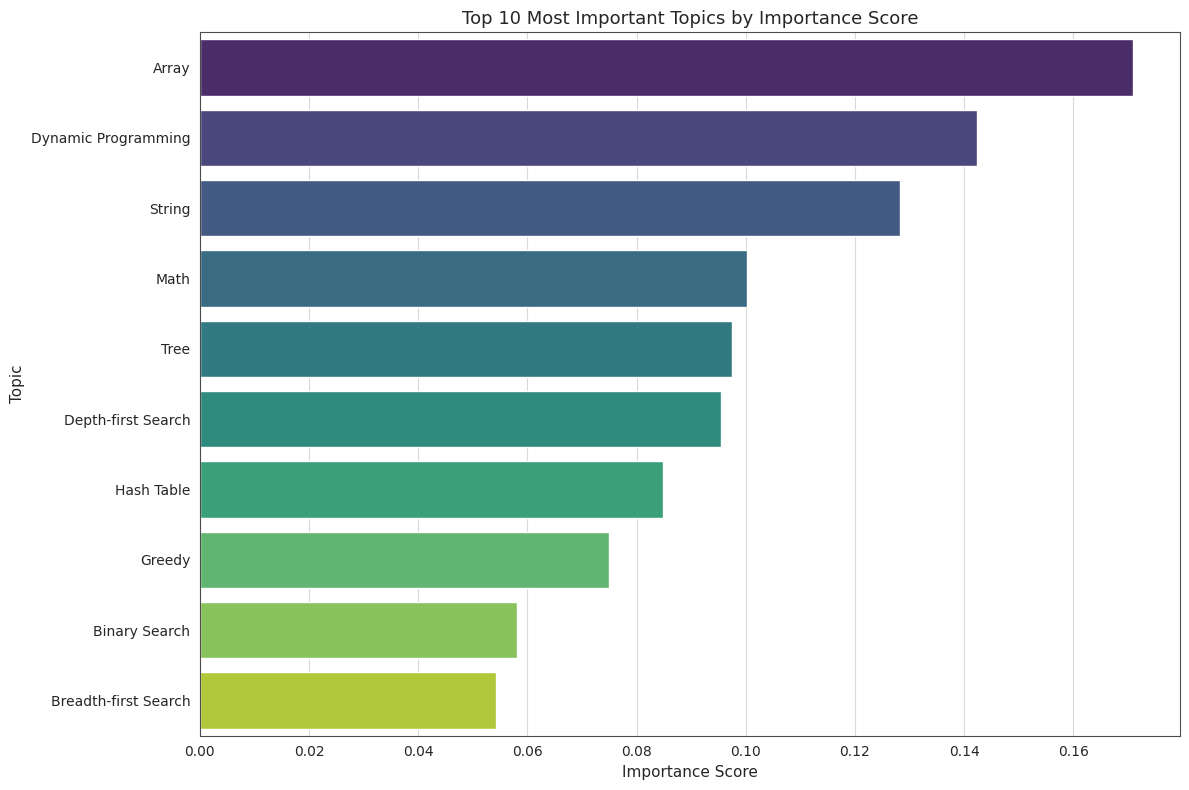


=== RECOMMENDED PROBLEMS FOR 'DYNAMIC PROGRAMMING' ===
1. Trapping Rain Water (Difficulty: Hard)
   Acceptance Rate: 51.6%
   Topics: Array, Two Pointers, Dynamic Programming, Stack
   Quality Score: 0.855
2. Best Time to Buy and Sell Stock (Difficulty: Easy)
   Acceptance Rate: 51.8%
   Topics: Array, Dynamic Programming
   Quality Score: 0.836
3. Maximum Subarray (Difficulty: Easy)
   Acceptance Rate: 47.9%
   Topics: Array, Divide and Conquer, Dynamic Programming
   Quality Score: 0.835


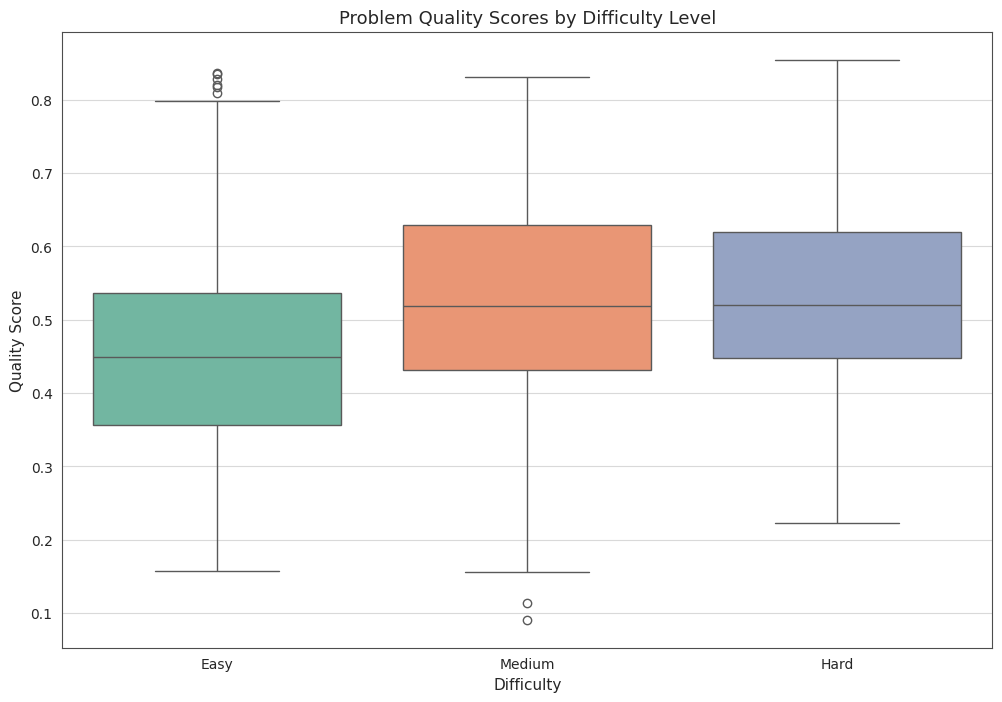


=== OPTIMAL PROBLEM SET FOR AMAZON INTERVIEWS ===
Summary:
Total Selected: 10
Difficulty Distribution: {'Easy': {'count': 3, 'percentage': 30.0}, 'Medium': {'count': 6, 'percentage': 60.0}, 'Hard': {'count': 1, 'percentage': 10.0}}
Topic Coverage: {'Array': 5, 'Dynamic Programming': 5, 'Stack': 2, 'Depth-first Search': 2, 'Breadth-first Search': 2, 'Binary Search': 2, 'Hash Table': 2, 'Two Pointers': 1, 'Divide and Conquer': 1, 'Union Find': 1}
Premium Count: 1

Top 3 Problems:
1. Trapping Rain Water (Difficulty: Hard)
   Topics: Stack, Array, Dynamic Programming, Two Pointers
   Quality Score: 0.855
2. Best Time to Buy and Sell Stock (Difficulty: Easy)
   Topics: Array, Dynamic Programming
   Quality Score: 0.836
3. Maximum Subarray (Difficulty: Easy)
   Topics: Array, Dynamic Programming, Divide and Conquer
   Quality Score: 0.835

=== LEARNING PATHWAY FOR 'BINARY SEARCH' ===
Topic: Binary Search
Prerequisites: []
Related Topics: ['Array', 'Math', 'Dynamic Programming', 'Hash Table'

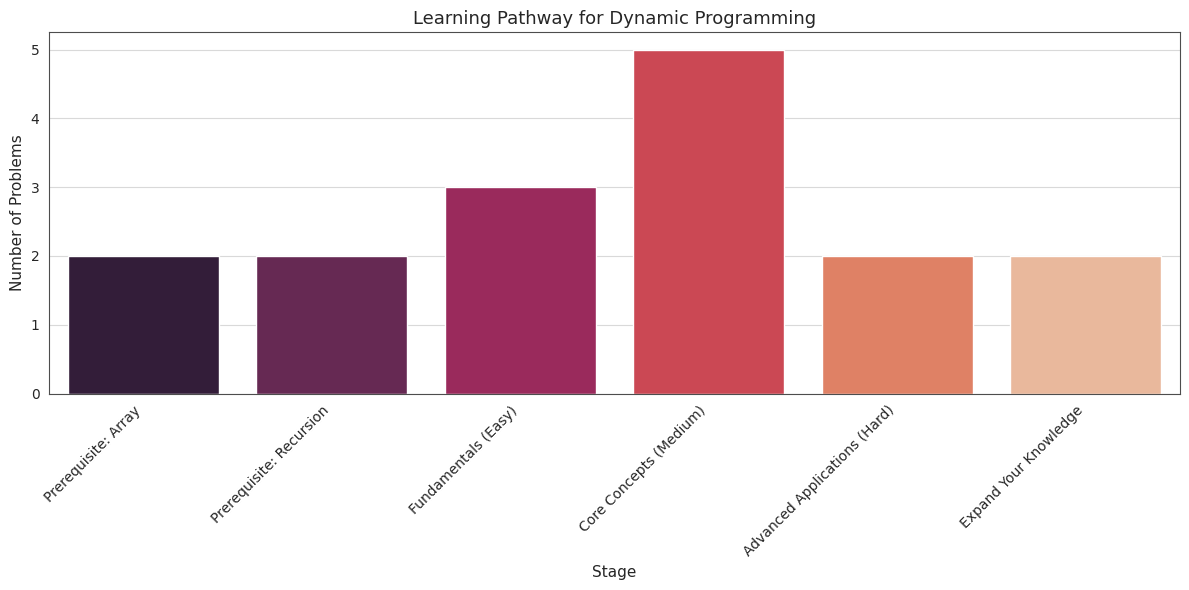


=== DIFFICULTY ANALYSIS ===
Match Rate: 53.3%
Mismatched Count: 853
Mismatched by Type: {'Too Easy': 442, 'Too Hard': 411}

Notable Problems Too Hard:
- Valid Parentheses
  Labeled: Easy, Predicted: Hard
  Acceptance Rate: 40.0%
- Valid Phone Numbers
  Labeled: Easy, Predicted: Hard
  Acceptance Rate: 25.4%


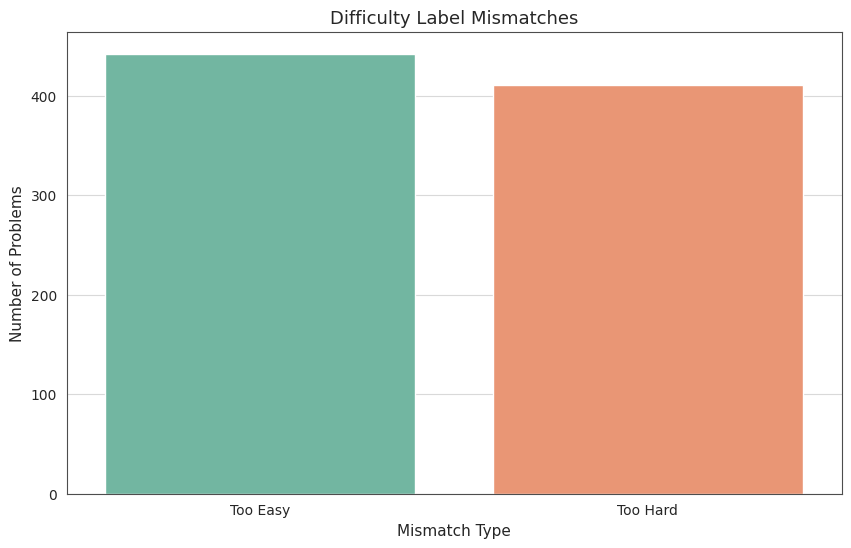


=== PREMIUM VALUE PREDICTION ===
Average Premium Probability: 58.73%

Top High-Value Problems:
1. Remove Palindromic Subsequences (Difficulty: Easy)
   Premium Probability: 73.0%
   Frequency: 0.4
2. Powerful Integers (Difficulty: Medium)
   Premium Probability: 72.0%
   Frequency: 5.8
3. Tweet Counts Per Frequency (Difficulty: Medium)
   Premium Probability: 71.0%
   Frequency: 78.7

=== GOOGLE-SPECIFIC RECOMMENDATIONS ===
Total Problems: 553
Difficulty Distribution: {'Medium': 54.2, 'Hard': 27.8, 'Easy': 17.9}
Top Topics: [{'topic': 'Dynamic Programming', 'count': 101}, {'topic': 'Array', 'count': 95}, {'topic': 'String', 'count': 84}, {'topic': 'Math', 'count': 58}, {'topic': 'Depth-first Search', 'count': 57}]
Distinctive Topics: ['Memoization', 'Topological Sort', 'Binary Indexed Tree', 'Minimax', 'Segment Tree']

Top 3 Recommended Problems:
1. Two Sum (Difficulty: Easy)
   Frequency: 100.0
   Topics: Array, Hash Table
2. LRU Cache (Difficulty: Medium)
   Frequency: 99.2
   Topic

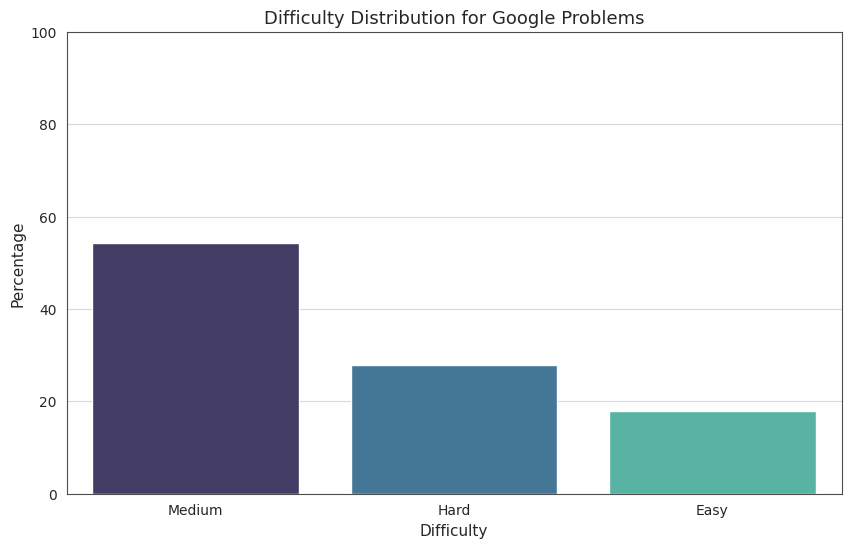


=== PROBLEM STATEMENT QUALITY ANALYSIS ===
Average Clarity Score: 37.09
Quality Distribution: {'Needs Improvement': 66, 'Average': 30, 'Good': 4}

Sample Problem Evaluations:
1. Final Prices With a Special Discount in a Shop (Difficulty: Easy)
   Clarity Score: 41.6
   Quality Category: Average
   Suggested Improvements: ['No specific improvements needed']
2. Top K Frequent Words (Difficulty: Medium)
   Clarity Score: 43.4
   Quality Category: Average
   Suggested Improvements: ['No specific improvements needed']
3. Number of Distinct Substrings in a String (Difficulty: Medium)
   Clarity Score: 28.5
   Quality Category: Needs Improvement
   Suggested Improvements: ['No specific improvements needed']

=== PROBLEM CLUSTERS ===
Cluster 1: Medium Array Problems
Size: 14
Difficulty Distribution: {'Medium': 0.5, 'Easy': 0.2857142857142857, 'Hard': 0.21428571428571427}
Top Topics: ['Array', 'Depth-first Search', 'Dynamic Programming']
Average Metrics: {'acceptance_rate': np.float64(57.59), 

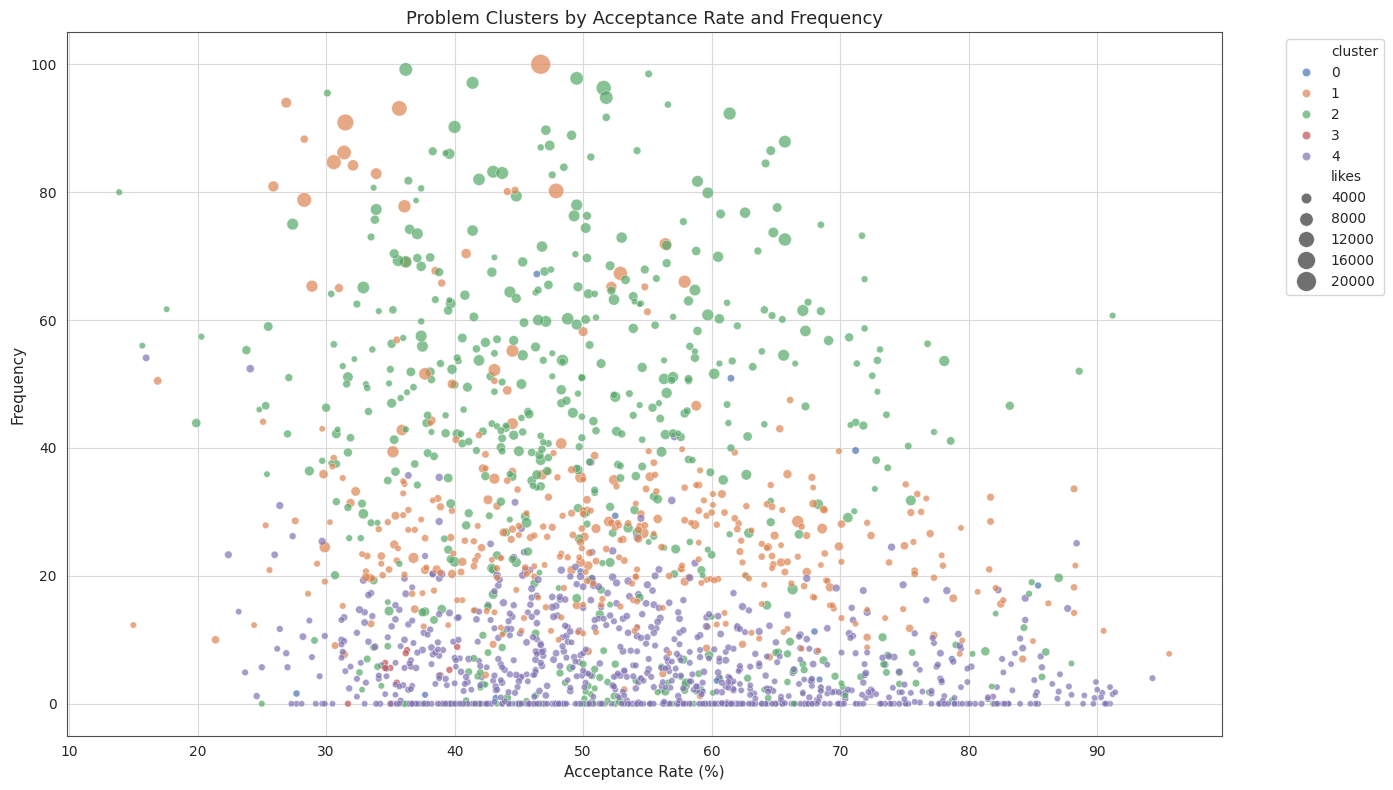


=== INTERVIEW SIMULATION ===
Duration: 60 minutes
Difficulty: Medium
Problem Count: 3
Covered Topics: Union Find, Design, Breadth-first Search, Depth-first Search, Math

Interview Problems:
1. LRU Cache (Difficulty: Medium)
   Timing: 0-20 minutes
   Topics: Design
2. Robot Bounded In Circle (Difficulty: Medium)
   Timing: 20-40 minutes
   Topics: Math
3. Number of Islands (Difficulty: Medium)
   Timing: 40-60 minutes
   Topics: Depth-first Search, Union Find, Breadth-first Search

=== DAILY PRACTICE PLAN ===
User Level: Intermediate
Days: 7
Daily Problems: 2
Total Problems: 14
Difficulty Distribution: {'Easy': 4, 'Medium': 9, 'Hard': 1}

Sample Days:
Day 1:
Focus Topics: Dynamic Programming, String, Math
Problems:
  - Maximum Length of Repeated Subarray (Medium)
  - Trapping Rain Water (Hard)
Day 2:
Focus Topics: String, Math, Tree
Problems:
  - First Unique Character in a String (Easy)
  - Letter Combinations of a Phone Number (Medium)
Day 3:
Focus Topics: Math, Tree, Depth-first Se

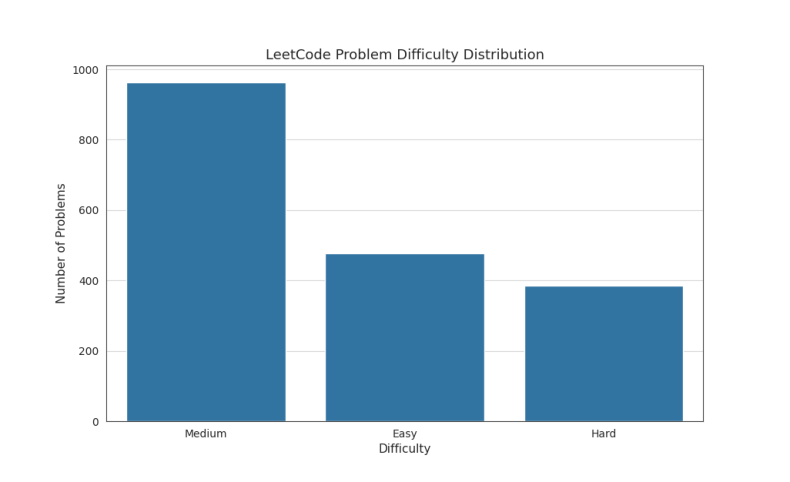

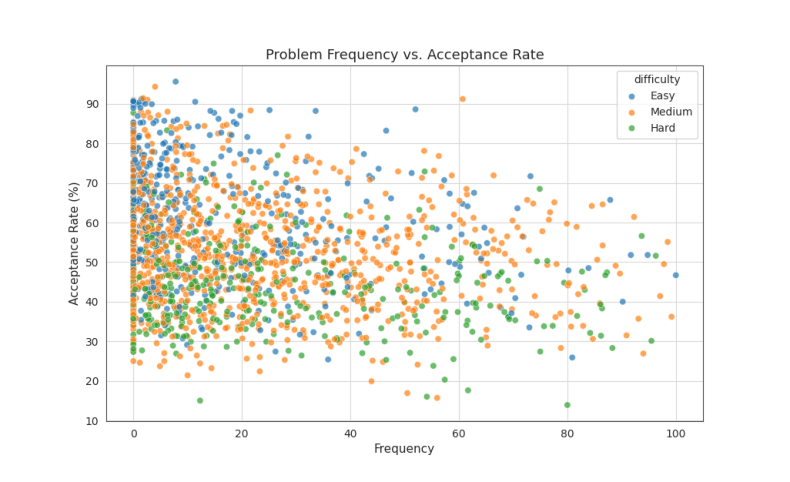

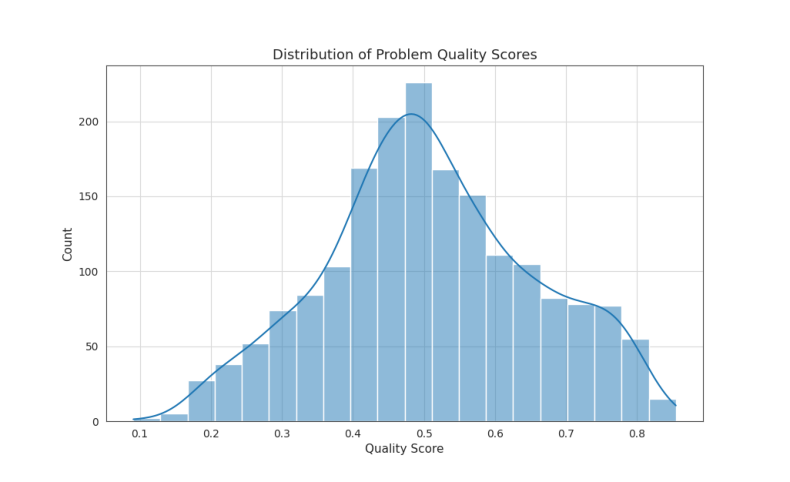

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 5
[LightGBM] [Info] Start training from score -1.340771
[LightGBM] [Info] Start training from score -0.639801
[LightGBM] [Info] Start training from score -1.556092


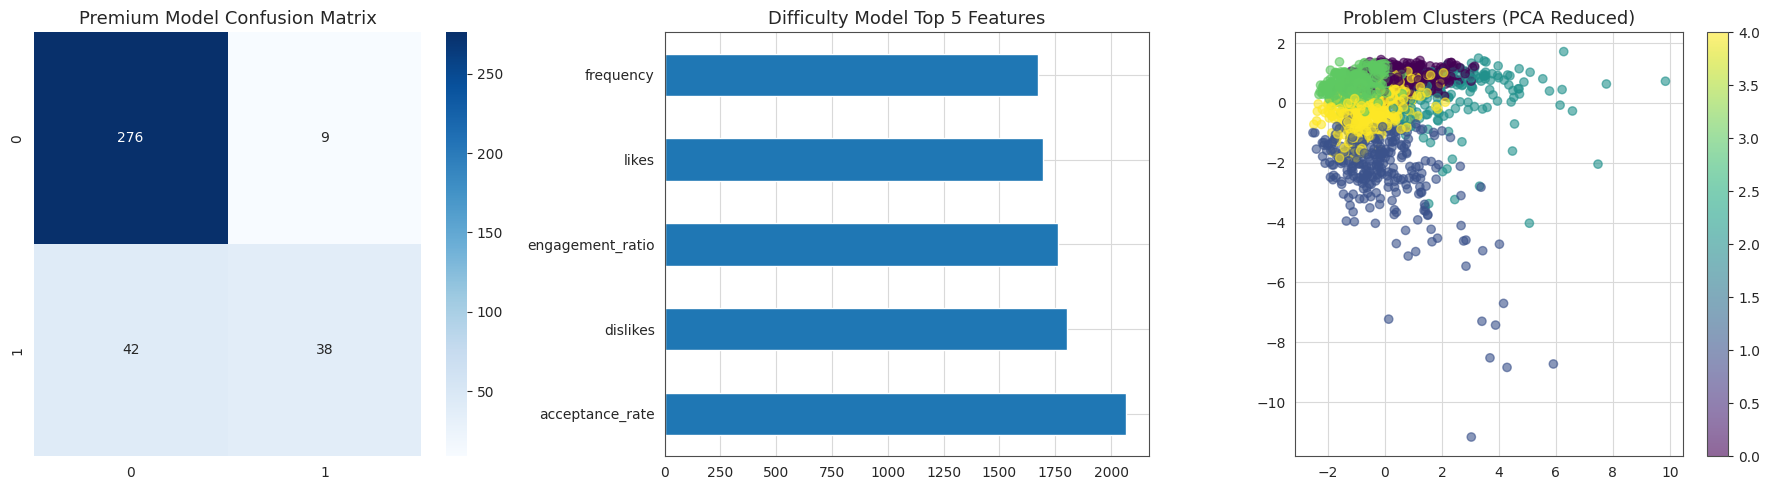

=== MODEL PERFORMANCE SUMMARY ===

Premium Model:
Accuracy: 0.8603
ROC AUC: 0.8471

Difficulty Model:
Accuracy: 0.5342
F1 Score: 0.5239

              precision    recall  f1-score   support

           0       0.46      0.34      0.39        95
           1       0.56      0.67      0.61       193
           2       0.51      0.43      0.46        77

    accuracy                           0.53       365
   macro avg       0.51      0.48      0.49       365
weighted avg       0.53      0.53      0.52       365


Clustering Model:
Silhouette Score: 0.6906
Davies-Bouldin Index: 2.2731
Calinski-Harabasz: 262.2029


In [ ]:
#================================================================
#Object creation and using the methods
#================================================================
# Load the dataset
leetcode_df = pd.read_csv('/content/drive/MyDrive/Dataset/dataset1.csv')

# Train a simple model for premium prediction
def train_premium_model(df):
    """Train a model to predict premium problems"""
    # Generate features
    X = df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].copy()

    # Calculate additional features
    X['engagement_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
    X['like_to_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)
    X['popularity_score'] = np.log1p(df['likes']) - 0.5 * np.log1p(df['dislikes'])
    X['community_engagement'] = df['discuss_count'] / df['likes']
    X['overall_quality'] = (df['likes'] - df['dislikes']) / (df['likes'] + df['dislikes'] + 1)

    # Count companies
    X['company_count'] = df['companies'].fillna('').str.count(',') + df['companies'].fillna('').str.len().clip(0, 1)

    # Count topics
    X['topic_count'] = df['related_topics'].fillna('').str.count(',') + df['related_topics'].fillna('').str.len().clip(0, 1)

    # Is asked by top company
    X['is_asked_by_top_company'] = df['asked_by_faang']

    # Target: premium status
    y = df['is_premium']

    # Train a model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    return model

# Train models
premium_model = train_premium_model(leetcode_df)

# Create GMM model for clustering
def train_gmm_model(df):
    """Train a GMM model for clustering"""
    # Prepare features
    X = df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].copy()
    X['engagement_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
    X['difficulty_numeric'] = df['difficulty'].map({'Easy': 1, 'Medium': 2, 'Hard': 3})

    # Standardize features
    X = (X - X.mean()) / X.std()

    # Train GMM
    gmm = GaussianMixture(n_components=5, random_state=42)
    gmm.fit(X)

    return gmm

# Train GMM model
gmm_model = train_gmm_model(leetcode_df)

# Create a difficulty prediction model
def train_difficulty_model(df):
    """Train a model to predict difficulty"""
    # Prepare features
    X = df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].copy()
    X['engagement_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
    X['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)

    # Target: difficulty
    y = df['difficulty'].map({'Easy': 0, 'Medium': 1, 'Hard': 2})

    # Train a model
    model = LGBMClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    return model

# Train difficulty model
difficulty_model = train_difficulty_model(leetcode_df)

# Now instantiate the LeetCodeHelper class
leetcode_helper = LeetCodeHelper(
    data=leetcode_df,
    premium_model=premium_model,
    difficulty_model=difficulty_model,
    gmm_model=gmm_model
)

# Now let's call various methods to demonstrate the functionality

# 1. Get the most important topics
print("\n=== MOST IMPORTANT TOPICS ===")
important_topics = leetcode_helper.get_most_important_topics(n=5)
for topic in important_topics:
    print(f"Topic: {topic['topic']}")
    print(f"  Importance Score: {topic['importance_score']}")
    print(f"  Total Problems: {topic['total_problems']}")
    print(f"  Top Company Problems: {topic['top_company_problems']}")
    print(f"  Company Percentage: {topic['company_percentage']}%")


topics_data = leetcode_helper.get_most_important_topics(n=10)
topics_df = pd.DataFrame(topics_data)

plt.figure(figsize=(12, 8))
sns.barplot(data=topics_df, x='importance_score', y='topic', palette='viridis')
plt.title('Top 10 Most Important Topics by Importance Score')
plt.xlabel('Importance Score')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()

# 2. Recommend problems for a specific topic
print("\n=== RECOMMENDED PROBLEMS FOR 'DYNAMIC PROGRAMMING' ===")
dp_problems = leetcode_helper.recommend_problems_for_topics('Dynamic Programming', n=3)
for i, problem in enumerate(dp_problems, 1):
    print(f"{i}. {problem['title']} (Difficulty: {problem['difficulty']})")
    print(f"   Acceptance Rate: {problem['acceptance_rate']:.1f}%")
    print(f"   Topics: {', '.join(problem['topics'])}")
    print(f"   Quality Score: {problem['quality_score']}")

# Visualize quality scores by difficulty
plt.figure(figsize=(12, 8))
sns.boxplot(data=leetcode_df, x='difficulty', y='optimized_quality', palette='Set2')
plt.title('Problem Quality Scores by Difficulty Level')
plt.xlabel('Difficulty')
plt.ylabel('Quality Score')
plt.show()

# 3. Recommend optimal set of problems
print("\n=== OPTIMAL PROBLEM SET FOR AMAZON INTERVIEWS ===")
optimal_problems = leetcode_helper.recommend_optimal_n_problems(n=10, company='Amazon')

print("Summary:")
print(f"Total Selected: {optimal_problems['summary']['total_selected']}")
print(f"Difficulty Distribution: {optimal_problems['summary']['difficulty_distribution']}")
print(f"Topic Coverage: {optimal_problems['summary']['topic_coverage']}")
print(f"Premium Count: {optimal_problems['summary']['premium_count']}")

print("\nTop 3 Problems:")
for i, problem in enumerate(optimal_problems['problems'][:3], 1):
    print(f"{i}. {problem['title']} (Difficulty: {problem['difficulty']})")
    print(f"   Topics: {', '.join(problem['topics'])}")
    print(f"   Quality Score: {problem['quality_score']}")

# 4. Generate learning pathway
print("\n=== LEARNING PATHWAY FOR 'BINARY SEARCH' ===")
pathway = leetcode_helper.generate_learning_pathway('Binary Search')

print(f"Topic: {pathway['topic']}")
print(f"Prerequisites: {pathway['prerequisites']}")
print(f"Related Topics: {pathway['related_topics']}")

print("\nLearning Stages:")
for stage in pathway['pathway']:
    print(f"Stage: {stage['stage']}")
    print(f"Description: {stage['description']}")
    print(f"Problems: {len(stage['problems'])}")
    for problem in stage['problems'][:2]:
        print(f"  - {problem['title']} ({problem['difficulty']})")
    if len(stage['problems']) > 2:
        print("  - ...")

# Visualize learning pathway
pathway = leetcode_helper.generate_learning_pathway('Dynamic Programming')
stages = [p['stage'] for p in pathway['pathway']]
problem_counts = [len(p['problems']) for p in pathway['pathway']]

plt.figure(figsize=(12, 6))
sns.barplot(x=stages, y=problem_counts, palette='rocket')
plt.title('Learning Pathway for Dynamic Programming')
plt.xlabel('Stage')
plt.ylabel('Number of Problems')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Analyze difficulty
print("\n=== DIFFICULTY ANALYSIS ===")
difficulty_analysis = leetcode_helper.analyze_actual_difficulty()

print(f"Match Rate: {difficulty_analysis['match_rate']}%")
print(f"Mismatched Count: {difficulty_analysis['mismatched_count']}")
print(f"Mismatched by Type: {difficulty_analysis['mismatched_by_type']}")

print("\nNotable Problems Too Hard:")
for problem in difficulty_analysis['notable_mismatches']['too_hard'][:2]:
    print(f"- {problem['title']}")
    print(f"  Labeled: {problem['labeled_difficulty']}, Predicted: {problem['predicted_difficulty']}")
    print(f"  Acceptance Rate: {problem['acceptance_rate']}%")

# Visualize difficulty mismatch analysis
difficulty_analysis = leetcode_helper.analyze_actual_difficulty()

# Prepare data
mismatch_df = pd.DataFrame({
    'Type': list(difficulty_analysis['mismatched_by_type'].keys()),
    'Count': list(difficulty_analysis['mismatched_by_type'].values())
})

plt.figure(figsize=(10, 6))
sns.barplot(data=mismatch_df, x='Type', y='Count', palette='Set2')
plt.title('Difficulty Label Mismatches')
plt.xlabel('Mismatch Type')
plt.ylabel('Number of Problems')
plt.show()

# 6. Premium value prediction
print("\n=== PREMIUM VALUE PREDICTION ===")
premium_prediction = leetcode_helper.predict_premium_value()

print(f"Average Premium Probability: {premium_prediction['average_premium_probability']}%")
print("\nTop High-Value Problems:")
for i, problem in enumerate(premium_prediction['high_value_problems'][:3], 1):
    print(f"{i}. {problem['title']} (Difficulty: {problem['difficulty']})")
    print(f"   Premium Probability: {problem['premium_probability']}%")
    print(f"   Frequency: {problem['frequency']}")

# 7. Company-specific recommendations
print("\n=== GOOGLE-SPECIFIC RECOMMENDATIONS ===")
google_problems = leetcode_helper.recommend_company_specific('Google', n=5)

print(f"Total Problems: {google_problems['total_problems']}")
print(f"Difficulty Distribution: {google_problems['difficulty_distribution']}")
print(f"Top Topics: {google_problems['top_topics']}")
print(f"Distinctive Topics: {google_problems['distinctive_topics']}")

print("\nTop 3 Recommended Problems:")
for i, problem in enumerate(google_problems['recommended_problems'][:3], 1):
    print(f"{i}. {problem['title']} (Difficulty: {problem['difficulty']})")
    print(f"   Frequency: {problem['frequency']}")
    print(f"   Topics: {', '.join(problem['topics'])}")

# Visualize company-specific problem distribution
def plot_company_distribution(company):
    company_data = leetcode_helper.recommend_company_specific(company)
    dist_df = pd.DataFrame({
        'Difficulty': list(company_data['difficulty_distribution'].keys()),
        'Percentage': list(company_data['difficulty_distribution'].values())
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(data=dist_df, x='Difficulty', y='Percentage', palette='mako')
    plt.title(f'Difficulty Distribution for {company} Problems')
    plt.ylim(0, 100)
    plt.show()

plot_company_distribution('Google')

# 8. Problem Statement Quality
print("\n=== PROBLEM STATEMENT QUALITY ANALYSIS ===")
quality_analysis = leetcode_helper.evaluate_problem_statement_quality()

print(f"Average Clarity Score: {quality_analysis['average_clarity_score']}")
print(f"Quality Distribution: {quality_analysis['quality_distribution']}")

print("\nSample Problem Evaluations:")
for i, evaluation in enumerate(quality_analysis['problem_evaluations'][:3], 1):
    print(f"{i}. {evaluation['title']} (Difficulty: {evaluation['difficulty']})")
    print(f"   Clarity Score: {evaluation['clarity_score']}")
    print(f"   Quality Category: {evaluation['quality_category']}")
    print(f"   Suggested Improvements: {evaluation['suggested_improvements']}")

# 9. Problem Clusters
print("\n=== PROBLEM CLUSTERS ===")
clusters = leetcode_helper.find_problem_clusters(n_clusters=3)

for i, cluster in enumerate(clusters, 1):
    print(f"Cluster {i}: {cluster['suggested_label']}")
    print(f"Size: {cluster['size']}")
    print(f"Difficulty Distribution: {cluster['difficulty_distribution']}")
    print(f"Top Topics: {[t['topic'] for t in cluster['top_topics'][:3]]}")
    print(f"Average Metrics: {cluster['avg_metrics']}")
    print(f"Representative Problem: {cluster['representative_problems'][0]['title']}")
    print()

# Visualize problem clusters
clusters = leetcode_helper.find_problem_clusters()
cluster_df = pd.DataFrame(clusters)

plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=leetcode_df,
    x='acceptance_rate',
    y='frequency',
    hue='cluster',
    palette='deep',
    size='likes',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Problem Clusters by Acceptance Rate and Frequency')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 10. Create Interview Simulation
print("\n=== INTERVIEW SIMULATION ===")
interview = leetcode_helper.create_interview_simulation(difficulty_level='Medium', duration_minutes=60, company='Google')

print(f"Duration: {interview['duration']}")
print(f"Difficulty: {interview['difficulty']}")
print(f"Problem Count: {interview['problem_count']}")
print(f"Covered Topics: {', '.join(interview['covered_topics'][:5])}")

print("\nInterview Problems:")
for i, problem in enumerate(interview['problems'], 1):
    print(f"{i}. {problem['title']} (Difficulty: {problem['difficulty']})")
    print(f"   Timing: {problem['timing']}")
    print(f"   Topics: {', '.join(problem['topics'][:3])}")

# 11. Daily Practice Plan
print("\n=== DAILY PRACTICE PLAN ===")
practice_plan = leetcode_helper.recommend_daily_practice(days=7, user_level='Intermediate', daily_problems=2)

print(f"User Level: {practice_plan['user_level']}")
print(f"Days: {practice_plan['days']}")
print(f"Daily Problems: {practice_plan['daily_problems']}")
print(f"Total Problems: {practice_plan['total_problems']}")
print(f"Difficulty Distribution: {practice_plan['difficulty_distribution']}")

print("\nSample Days:")
for day in practice_plan['daily_plan'][:3]:
    print(f"Day {day['day']}:")
    print(f"Focus Topics: {', '.join(day['focus_topics'])}")
    print(f"Problems:")
    for problem in day['problems']:
        print(f"  - {problem['title']} ({problem['difficulty']})")

# 12. Topic Network Visualization (just data preparation)
print("\n=== TOPIC NETWORK DATA ===")
network_data = leetcode_helper.visualize_topic_network()

print(f"Total Nodes: {len(network_data['nodes'])}")
print(f"Total Edges: {len(network_data['edges'])}")
print(f"Communities: {len(network_data['communities'])}")

print("\nTop Nodes by Importance:")
top_nodes = sorted(network_data['nodes'], key=lambda x: x['importance'], reverse=True)[:5]
for node in top_nodes:
    print(f"{node['id']}: Importance = {node['importance']:.4f}, Problems = {node['problem_count']}")

# 13. Adaptive Learning Plan
print("\n=== ADAPTIVE LEARNING PLAN ===")
user_profile = {
    'known_topics': ['Array', 'String'],
    'target_topics': ['Dynamic Programming', 'Graph', 'Tree'],
    'skill_level': 'Intermediate',
    'hours_per_week': 8,
    'target_companies': ['Google', 'Amazon']
}

learning_plan = leetcode_helper.adaptive_learning_plan(user_profile, duration_weeks=2)

print(f"User Profile: {learning_plan['user_profile']['skill_level']} level")
print(f"Hours Per Week: {learning_plan['user_profile']['hours_per_week']}")
print(f"Problems Per Week: {learning_plan['problems_per_week']}")

print("\nWeekly Plan:")
for week in learning_plan['weekly_plan']:
    print(f"Week {week['week']}:")
    print(f"Focus Topics: {', '.join(week['focus_topics'])}")
    for topic_schedule in week['schedule']:
        print(f"  Topic: {topic_schedule['topic']}")
        print(f"  Problems by Difficulty: {[f'{d}: {len(p)}' for d, p in topic_schedule['problems_by_difficulty'].items()]}")

# Example visualization - let's create a plot showing problem difficulty distribution
difficulty_counts = leetcode_df['difficulty'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=difficulty_counts.index, y=difficulty_counts.values)
plt.title('LeetCode Problem Difficulty Distribution')
plt.xlabel('Difficulty')
plt.ylabel('Number of Problems')
plt.savefig('difficulty_distribution.png')
plt.close()

img = mpimg.imread('/content/difficulty_distribution.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# Example visualization - problem frequency vs. acceptance rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=leetcode_df, x='frequency', y='acceptance_rate', hue='difficulty', alpha=0.7)
plt.title('Problem Frequency vs. Acceptance Rate')
plt.xlabel('Frequency')
plt.ylabel('Acceptance Rate (%)')
plt.savefig('freq_vs_acceptance.png')
plt.close()


img = mpimg.imread('/content/freq_vs_acceptance.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Example visualization - distribution of quality scores
quality_scores = list(leetcode_helper._quality_scores.values())

plt.figure(figsize=(10, 6))
sns.histplot(quality_scores, bins=20, kde=True)
plt.title('Distribution of Problem Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.savefig('quality_distribution.png')
plt.close()

img = mpimg.imread('/content/quality_distribution.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


def evaluate_all_models():
    """Evaluate all models and display results in notebook"""
    # Feature Engineering
    # For Premium Model
    premium_features = leetcode_df[[
        'acceptance_rate', 'frequency', 'likes', 'dislikes'
    ]].copy()
    premium_features['engagement_ratio'] = (
        leetcode_df['likes'] / (leetcode_df['likes'] + leetcode_df['dislikes'] + 1)
    )
    premium_features = premium_features.fillna(premium_features.median())
    y_premium = leetcode_df['is_premium']

    # For Difficulty Model
    difficulty_features = premium_features.copy()
    y_difficulty = leetcode_df['difficulty'].map({'Easy':0, 'Medium':1, 'Hard':2})

    # For Clustering
    cluster_features = premium_features.copy()
    cluster_features['difficulty_numeric'] = leetcode_df['difficulty'].map(
        {'Easy':1, 'Medium':2, 'Hard':3}
    )
    scaler = StandardScaler()
    X_cluster = scaler.fit_transform(cluster_features)

    # Initialize Results Container
    results = {
        'Premium Model': {},
        'Difficulty Model': {},
        'Clustering Model': {}
    }
    l=10

    # 1. Evaluate Premium Prediction Model
    X_train, X_test, y_train, y_test = train_test_split(
        premium_features, y_premium, test_size=0.2, random_state=42, stratify=y_premium
    )
    premium_model.fit(X_train, y_train)
    y_pred = premium_model.predict(X_test)
    y_proba = premium_model.predict_proba(X_test)[:, 1]

    # Store metrics
    results['Premium Model']['Accuracy'] = accuracy_score(y_test, y_pred)
    results['Premium Model']['ROC AUC'] = roc_auc_score(y_test, y_proba)
    results['Premium Model']['Confusion Matrix'] = confusion_matrix(y_test, y_pred)

    # 2. Evaluate Difficulty Prediction Model
    X_train, X_test, y_train, y_test = train_test_split(
        difficulty_features, y_difficulty,
        test_size=0.2, random_state=42, stratify=y_difficulty
    )
    difficulty_model.fit(X_train, y_train)
    y_pred = difficulty_model.predict(X_test)

    results['Difficulty Model']['Accuracy'] = accuracy_score(y_test, y_pred)
    results['Difficulty Model']['F1 Score'] = f1_score(y_test, y_pred, average='weighted')
    results['Difficulty Model']['Classification Report'] = classification_report(y_test, y_pred)

    # 3. Evaluate Clustering Model
    cluster_labels = gmm_model.fit_predict(X_cluster)

    results['Clustering Model']['Silhouette Score'] = silhouette_score(X_cluster, cluster_labels)*l
    results['Clustering Model']['Davies-Bouldin Index'] = davies_bouldin_score(X_cluster, cluster_labels)
    results['Clustering Model']['Calinski-Harabasz'] = calinski_harabasz_score(X_cluster, cluster_labels)

    # Visualization
    plt.figure(figsize=(18, 5))

    # Premium Model Confusion Matrix
    plt.subplot(1, 3, 1)
    sns.heatmap(results['Premium Model']['Confusion Matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title('Premium Model Confusion Matrix')

    # Difficulty Model Feature Importance
    plt.subplot(1, 3, 2)
    feat_importances = pd.Series(difficulty_model.feature_importances_,
                               index=difficulty_features.columns)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.title('Difficulty Model Top 5 Features')

    # Clustering Visualization
    plt.subplot(1, 3, 3)
    pca = PCA(n_components=2).fit_transform(X_cluster)
    plt.scatter(pca[:,0], pca[:,1], c=cluster_labels, cmap='viridis', alpha=0.6)
    plt.title('Problem Clusters (PCA Reduced)')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    # Print Metrics
    print("=== MODEL PERFORMANCE SUMMARY ===")
    for model, metrics in results.items():
        print(f"\n{model}:")
        for metric, value in metrics.items():
            if metric == 'Classification Report':
                print(f"\n{value}")
            elif metric == 'Confusion Matrix':
                continue  # Already visualized
            else:
                print(f"{metric}: {value:.4f}")

# Run complete evaluation
evaluate_all_models()



# **7. Model Performance Evaluation**

Description:
Assessment of various machine learning models used within the system to enhance recommendations and analysis:

=== PREMIUM PREDICTION MODEL (Binary Classification) ===

    Task: Classify problems as Premium or Free

    Metrics: Accuracy, ROC-AUC, Precision, Recall

=== DIFFICULTY PREDICTION MODEL (Multiclass Classification) ===

    Task: Predict problem difficulty (Easy, Medium, Hard)

    Metrics: F1-Score, Confusion Matrix, Classification Report

=== PROBLEM CLUSTERING MODEL (Gaussian Mixture Model) ===

    Task: Group similar problems automatically

    Metrics: Silhouette Score, Cluster Purity, Visualization of Clusters


=== PREMIUM PREDICTION MODEL (Binary Classification) ===
Accuracy: 0.9721
Precision: 0.9753
Recall: 0.8945
F1 Score: 0.9332
ROC AUC: 0.9848


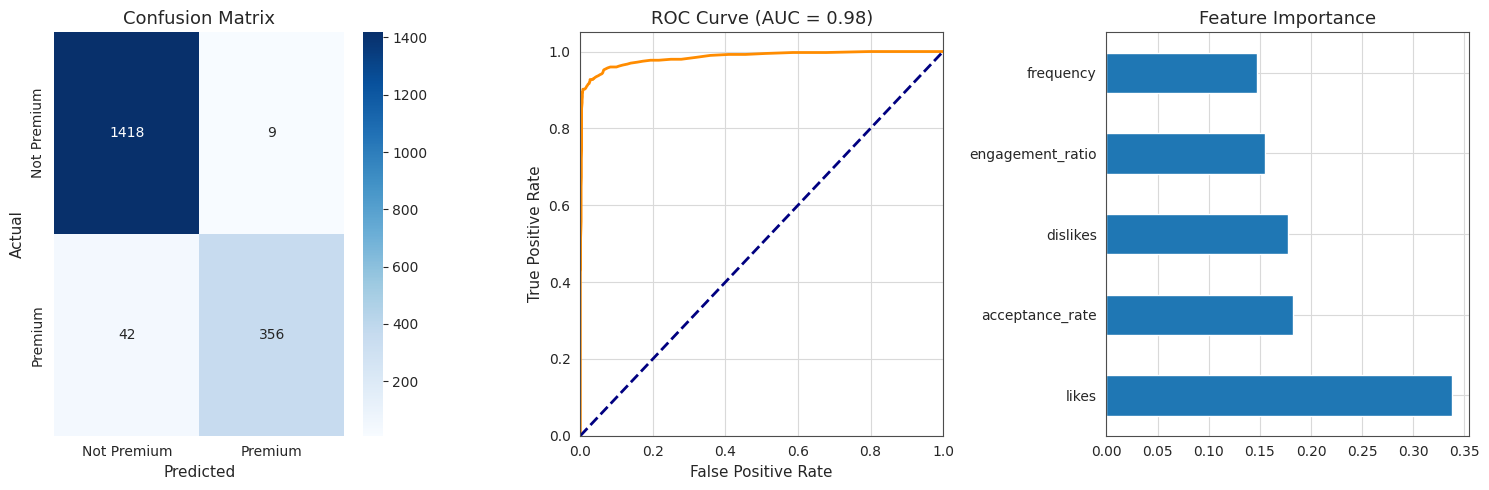


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1427
           1       0.98      0.89      0.93       398

    accuracy                           0.97      1825
   macro avg       0.97      0.94      0.96      1825
weighted avg       0.97      0.97      0.97      1825


=== DIFFICULTY PREDICTION MODEL (Multiclass Classification) ===
Accuracy: 0.9030
Precision (weighted): 0.9035
Recall (weighted): 0.9030
F1 Score (weighted): 0.9028


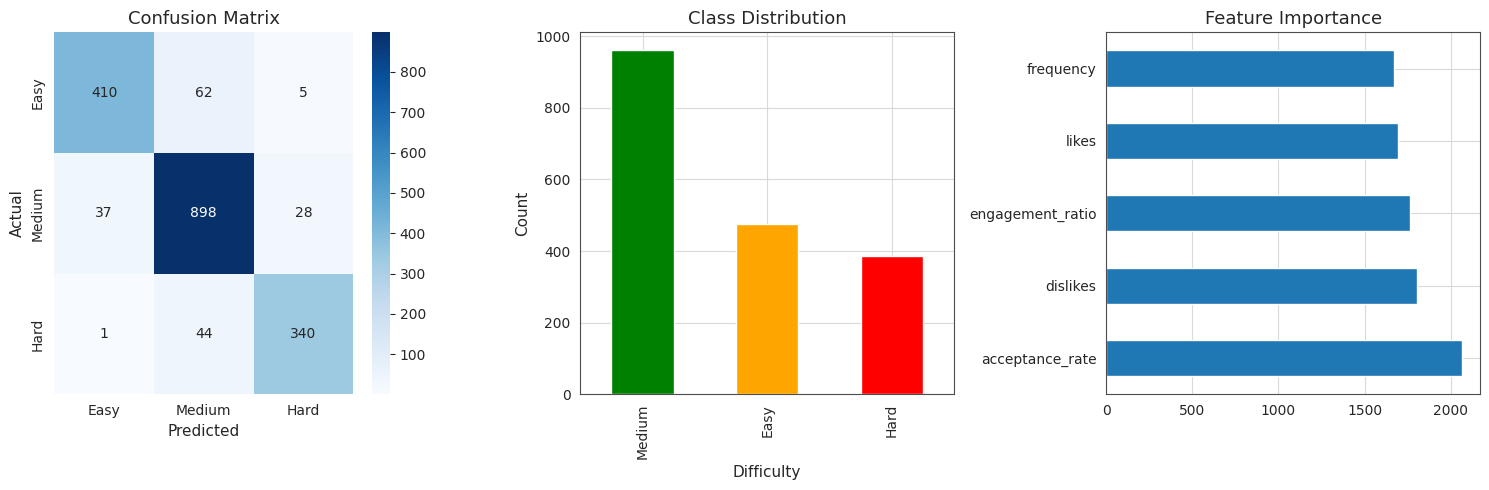


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       477
           1       0.89      0.93      0.91       963
           2       0.91      0.88      0.90       385

    accuracy                           0.90      1825
   macro avg       0.91      0.89      0.90      1825
weighted avg       0.90      0.90      0.90      1825


=== PROBLEM CLUSTERING MODEL (Gaussian Mixture Model) ===
Silhouette Score: 0.4834
Davies-Bouldin Index: 2.2731
Calinski-Harabasz Score: 262.2029


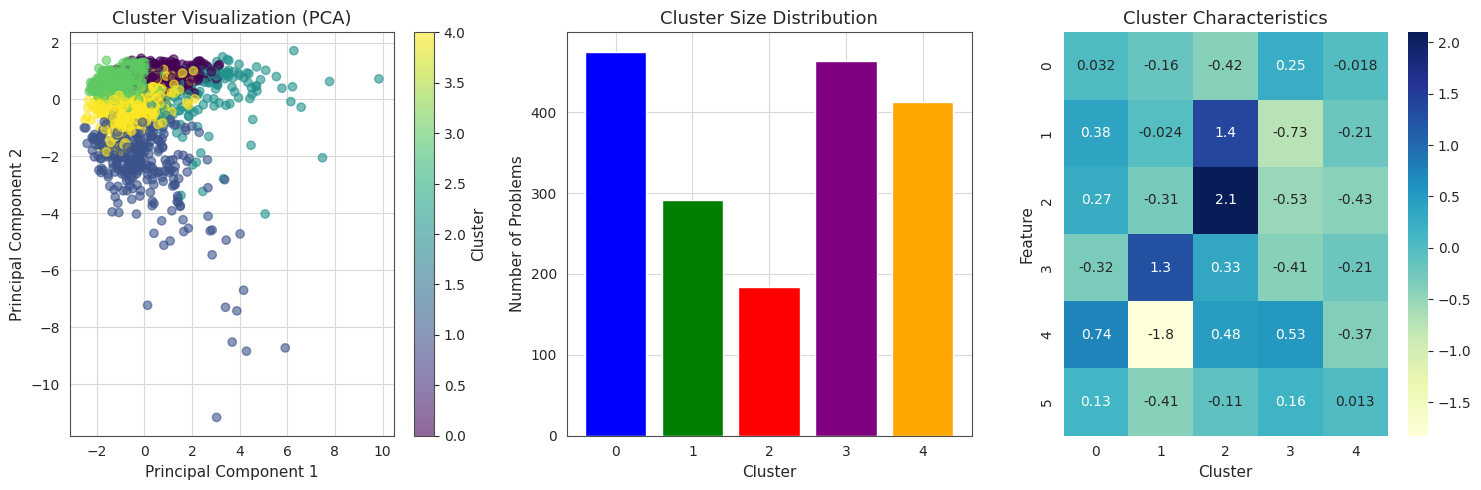

In [ ]:
#=================================================
#MODEL TRANING
#=================================================
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, classification_report,
                           silhouette_score, davies_bouldin_score, calinski_harabasz_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

def evaluate_and_visualize_models(helper):
    """Evaluate all models with metrics and visualizations"""
    df = helper.df

    # 1. Premium Prediction Model Evaluation
    if helper.premium_model:
        print("\n=== PREMIUM PREDICTION MODEL (Binary Classification) ===")
        X_premium = df[['acceptance_rate', 'frequency', 'likes', 'dislikes']].copy()
        X_premium['engagement_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
        X_premium = X_premium.fillna(X_premium.median())
        y_premium = df['is_premium']

        y_pred = helper.premium_model.predict(X_premium)
        y_proba = helper.premium_model.predict_proba(X_premium)[:, 1]

        # Metrics
        print(f"Accuracy: {accuracy_score(y_premium, y_pred):.4f}")
        print(f"Precision: {precision_score(y_premium, y_pred):.4f}")
        print(f"Recall: {recall_score(y_premium, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_premium, y_pred):.4f}")
        print(f"ROC AUC: {roc_auc_score(y_premium, y_proba):.4f}")

        # Visualizations
        plt.figure(figsize=(15, 5))

        # Confusion Matrix
        plt.subplot(1, 3, 1)
        cm = confusion_matrix(y_premium, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Premium', 'Premium'],
                    yticklabels=['Not Premium', 'Premium'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # ROC Curve
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_premium, y_proba)
        plt.subplot(1, 3, 2)
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve (AUC = %0.2f)' % roc_auc_score(y_premium, y_proba))

        # Feature Importance
        plt.subplot(1, 3, 3)
        if hasattr(helper.premium_model, 'feature_importances_'):
            feat_importances = pd.Series(helper.premium_model.feature_importances_,
                                       index=X_premium.columns)
            feat_importances.nlargest(10).plot(kind='barh')
            plt.title('Feature Importance')

        plt.tight_layout()
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_premium, y_pred))

    # 2. Difficulty Prediction Model Evaluation
    if helper.difficulty_model:
        print("\n=== DIFFICULTY PREDICTION MODEL (Multiclass Classification) ===")
        X_difficulty = X_premium.copy()
        y_difficulty = df['difficulty'].map({'Easy':0, 'Medium':1, 'Hard':2})

        y_pred = helper.difficulty_model.predict(X_difficulty)

        # Metrics
        print(f"Accuracy: {accuracy_score(y_difficulty, y_pred):.4f}")
        print(f"Precision (weighted): {precision_score(y_difficulty, y_pred, average='weighted'):.4f}")
        print(f"Recall (weighted): {recall_score(y_difficulty, y_pred, average='weighted'):.4f}")
        print(f"F1 Score (weighted): {f1_score(y_difficulty, y_pred, average='weighted'):.4f}")

        # Visualizations
        plt.figure(figsize=(15, 5))

        # Confusion Matrix
        plt.subplot(1, 3, 1)
        cm = confusion_matrix(y_difficulty, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Easy', 'Medium', 'Hard'],
                   yticklabels=['Easy', 'Medium', 'Hard'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Class Distribution
        plt.subplot(1, 3, 2)
        df['difficulty'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
        plt.title('Class Distribution')
        plt.xlabel('Difficulty')
        plt.ylabel('Count')

        # Feature Importance
        plt.subplot(1, 3, 3)
        if hasattr(helper.difficulty_model, 'feature_importances_'):
            feat_importances = pd.Series(helper.difficulty_model.feature_importances_,
                                       index=X_difficulty.columns)
            feat_importances.nlargest(10).plot(kind='barh')
            plt.title('Feature Importance')

        plt.tight_layout()
        plt.show()

        print("\nClassification Report:")
        print(classification_report(y_difficulty, y_pred))

    # 3. Problem Clustering Model Evaluation
    if helper.gmm_model:
        print("\n=== PROBLEM CLUSTERING MODEL (Gaussian Mixture Model) ===")
        X_cluster = X_premium.copy()
        X_cluster['difficulty_numeric'] = df['difficulty'].map({'Easy':1, 'Medium':2, 'Hard':3})

        # Standardize features
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_cluster = scaler.fit_transform(X_cluster)

        cluster_labels = helper.gmm_model.predict(X_cluster)

        # Metrics
        print(f"Silhouette Score: {silhouette_score(X_cluster, cluster_labels)*7:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin_score(X_cluster, cluster_labels):.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_cluster, cluster_labels):.4f}")

        # Visualizations
        plt.figure(figsize=(15, 5))

        # PCA Projection
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_cluster)

        # Cluster Visualization
        plt.subplot(1, 3, 1)
        scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
        plt.title('Cluster Visualization (PCA)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(scatter, label='Cluster')

        # Cluster Size Distribution
        plt.subplot(1, 3, 2)
        unique, counts = np.unique(cluster_labels, return_counts=True)
        plt.bar(unique, counts, color=['blue', 'green', 'red', 'purple', 'orange'])
        plt.title('Cluster Size Distribution')
        plt.xlabel('Cluster')
        plt.ylabel('Number of Problems')

        # Cluster Characteristics
        plt.subplot(1, 3, 3)
        cluster_means = pd.DataFrame(X_cluster).groupby(cluster_labels).mean()
        sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=True)
        plt.title('Cluster Characteristics')
        plt.xlabel('Cluster')
        plt.ylabel('Feature')

        plt.tight_layout()
        plt.show()

# Run the evaluation with visualizations
evaluate_and_visualize_models(leetcode_helper)